In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [2]:
%matplotlib inline

In [3]:
import os
from sys import platform as _platform

if _platform == "linux" or _platform == "linux2":
    # linux
    plt.rc('font', family='NanumGothic')
elif _platform == "darwin":
    # MAC OS X
    plt.rc('font', family="AppleGothic")
elif _platform == "win32":
    # Windows
    pass
elif _platform == "win64":
    # Windows 64-bit
    pass
    
plt.rc('axes', unicode_minus=False)
%config InlineBackend.figure_format = 'retina'

In [4]:
[f.fname for f in fm.fontManager.ttflist]

['/opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniIta.ttf',
 '/opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizOneSymBol.ttf',
 '/opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/cmsy10.ttf',
 '/opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizTwoSymReg.ttf',
 '/opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/NanumSquareEB.ttf',
 '/opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/NanumMyeongjoEcoBold.ttf',
 '/opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/NanumMyeongjoBold.ttf',
 '/opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/NanumSquareRoundL.ttf',
 '/opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralItalic.ttf',
 '/opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansDisplay.ttf',
 '/opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/t

In [5]:
df = pd.read_csv("data/NHIS_OPEN_GJ_2017_v1.1.csv", encoding="cp949")
df

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg단위)  허리둘레  \
0       2017        1     1            8    43        170         75  90.0   
1       2017        2     1            7    11        180         80  89.0   
2       2017        3     1            9    41        165         75  91.0   
3       2017        4     1           11    48        175         80  91.0   
4       2017        5     1           11    30        165         60  80.0   
...      ...      ...   ...          ...   ...        ...        ...   ...   
999995  2017   999996     1           10    48        175         80  92.1   
999996  2017   999997     1            8    41        170         75  86.0   
999997  2017   999998     2            9    26        155         50  68.0   
999998  2017   999999     1            6    29        175         60  72.0   
999999  2017  1000000     1           11    41        160         70  90.5   

        시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진수검여부  치아우식증유무  결손치유무  \
0         1.0    1.0  ...   40.0   1.0     Y         Y      NaN    NaN   
1         0.9    1.2  ...   27.0   3.0     N         Y      NaN    NaN   
2         1.2    1.5  ...   68.0   1.0     N         N      NaN    NaN   
3         1.5    1.2  ...   18.0   1.0     N         Y      NaN    NaN   
4         1.0    1.2  ...   25.0   1.0     N         Y      NaN    NaN   
...       ...    ...  ...    ...   ...   ...       ...      ...    ...   
999995    1.5    1.5  ...   27.0   1.0     N         N      NaN    NaN   
999996    1.0    1.5  ...   15.0   1.0     N         N      NaN    NaN   
999997    1.0    0.7  ...   17.0   3.0     Y         N      NaN    NaN   
999998    1.5    1.0  ...   17.0   1.0     N         N      NaN    NaN   
999999    1.0    1.5  ...   36.0   3.0     Y         N      NaN    NaN   

        치아마모증유무  제3대구치(사랑니)이상   치석     데이터공개일자  
0           NaN           NaN    Y  2018-11-26  
1           NaN           NaN  NaN  2018-11-26  
2           NaN           NaN  NaN  2018-11-26  
3           NaN           NaN    N  2018-11-26  
4           NaN           NaN    N  2018-11-26  
...         ...           ...  ...         ...  
999995      NaN           NaN  NaN  2018-11-26  
999996      NaN           NaN  NaN  2018-11-26  
999997      NaN           NaN  NaN  2018-11-26  
999998      NaN           NaN  NaN  2018-11-26  
999999      NaN           NaN  NaN  2018-11-26  

[1000000 rows x 34 columns]

In [6]:
df.shape

(1000000, 34)

In [7]:
df.head()

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg단위)  허리둘레  시력(좌)  \
0  2017        1     1            8    43        170         75  90.0    1.0   
1  2017        2     1            7    11        180         80  89.0    0.9   
2  2017        3     1            9    41        165         75  91.0    1.2   
3  2017        4     1           11    48        175         80  91.0    1.5   
4  2017        5     1           11    30        165         60  80.0    1.0   

   시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진수검여부  치아우식증유무  결손치유무  치아마모증유무  \
0    1.0  ...   40.0   1.0     Y         Y      NaN    NaN      NaN   
1    1.2  ...   27.0   3.0     N         Y      NaN    NaN      NaN   
2    1.5  ...   68.0   1.0     N         N      NaN    NaN      NaN   
3    1.2  ...   18.0   1.0     N         Y      NaN    NaN      NaN   
4    1.2  ...   25.0   1.0     N         Y      NaN    NaN      NaN   

   제3대구치(사랑니)이상   치석     데이터공개일자  
0           NaN    Y  2018-11-26  
1           NaN  NaN  2018-11-26  
2           NaN  NaN  2018-11-26  
3           NaN    N  2018-11-26  
4           NaN    N  2018-11-26  

[5 rows x 34 columns]

In [8]:
df.tail()

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg단위)  허리둘레  \
999995  2017   999996     1           10    48        175         80  92.1   
999996  2017   999997     1            8    41        170         75  86.0   
999997  2017   999998     2            9    26        155         50  68.0   
999998  2017   999999     1            6    29        175         60  72.0   
999999  2017  1000000     1           11    41        160         70  90.5   

        시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진수검여부  치아우식증유무  결손치유무  \
999995    1.5    1.5  ...   27.0   1.0     N         N      NaN    NaN   
999996    1.0    1.5  ...   15.0   1.0     N         N      NaN    NaN   
999997    1.0    0.7  ...   17.0   3.0     Y         N      NaN    NaN   
999998    1.5    1.0  ...   17.0   1.0     N         N      NaN    NaN   
999999    1.0    1.5  ...   36.0   3.0     Y         N      NaN    NaN   

        치아마모증유무  제3대구치(사랑니)이상   치석     데이터공개일자  
999995      NaN           NaN  NaN  2018-11-26  
999996      NaN           NaN  NaN  2018-11-26  
999997      NaN           NaN  NaN  2018-11-26  
999998      NaN           NaN  NaN  2018-11-26  
999999      NaN           NaN  NaN  2018-11-26  

[5 rows x 34 columns]

In [9]:
df.sample()

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg단위)  허리둘레  \
698193  2017   698194     2           10    11        155         50  74.0   

        시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진수검여부  치아우식증유무  결손치유무  \
698193    0.8    1.0  ...   30.0   1.0     N         N      NaN    NaN   

        치아마모증유무  제3대구치(사랑니)이상   치석     데이터공개일자  
698193      NaN           NaN  NaN  2018-11-26  

[1 rows x 34 columns]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     1000000 non-null  int64  
 6   체중(5Kg단위)     1000000 non-null  int64  
 7   허리둘레          999734 non-null   float64
 8   시력(좌)         999817 non-null   float64
 9   시력(우)         999811 non-null   float64
 10  청력(좌)         999842 non-null   float64
 11  청력(우)         999844 non-null   float64
 12  수축기혈압         999981 non-null   float64
 13  이완기혈압         999982 non-null   float64
 14  식전혈당(공복혈당)    999958 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999955 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

In [11]:
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

In [12]:
df.dtypes

기준년도              int64
가입자일련번호           int64
성별코드              int64
연령대코드(5세단위)       int64
시도코드              int64
신장(5Cm단위)         int64
체중(5Kg단위)         int64
허리둘레            float64
시력(좌)           float64
시력(우)           float64
청력(좌)           float64
청력(우)           float64
수축기혈압           float64
이완기혈압           float64
식전혈당(공복혈당)      float64
총콜레스테롤          float64
트리글리세라이드        float64
HDL콜레스테롤        float64
LDL콜레스테롤        float64
혈색소             float64
요단백             float64
혈청크레아티닌         float64
(혈청지오티)AST      float64
(혈청지오티)ALT      float64
감마지티피           float64
흡연상태            float64
음주여부             object
구강검진수검여부         object
치아우식증유무         float64
결손치유무           float64
치아마모증유무         float64
제3대구치(사랑니)이상    float64
치석               object
데이터공개일자          object
dtype: object

In [13]:
df.isnull()

기준년도  가입자일련번호   성별코드  연령대코드(5세단위)   시도코드  신장(5Cm단위)  체중(5Kg단위)  \
0       False    False  False        False  False      False      False   
1       False    False  False        False  False      False      False   
2       False    False  False        False  False      False      False   
3       False    False  False        False  False      False      False   
4       False    False  False        False  False      False      False   
...       ...      ...    ...          ...    ...        ...        ...   
999995  False    False  False        False  False      False      False   
999996  False    False  False        False  False      False      False   
999997  False    False  False        False  False      False      False   
999998  False    False  False        False  False      False      False   
999999  False    False  False        False  False      False      False   

         허리둘레  시력(좌)  시력(우)  ...  감마지티피   흡연상태   음주여부  구강검진수검여부  치아우식증유무  \
0       False  False  False  ...  False  False  False     False     True   
1       False  False  False  ...  False  False  False     False     True   
2       False  False  False  ...  False  False  False     False     True   
3       False  False  False  ...  False  False  False     False     True   
4       False  False  False  ...  False  False  False     False     True   
...       ...    ...    ...  ...    ...    ...    ...       ...      ...   
999995  False  False  False  ...  False  False  False     False     True   
999996  False  False  False  ...  False  False  False     False     True   
999997  False  False  False  ...  False  False  False     False     True   
999998  False  False  False  ...  False  False  False     False     True   
999999  False  False  False  ...  False  False  False     False     True   

        결손치유무  치아마모증유무  제3대구치(사랑니)이상     치석  데이터공개일자  
0        True     True          True  False    False  
1        True     True          True   True    False  
2        True     True          True   True    False  
3        True     True          True  False    False  
4        True     True          True  False    False  
...       ...      ...           ...    ...      ...  
999995   True     True          True   True    False  
999996   True     True          True   True    False  
999997   True     True          True   True    False  
999998   True     True          True   True    False  
999999   True     True          True   True    False  

[1000000 rows x 34 columns]

In [14]:
null_count = df.isnull().sum()
null_count

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)             0
체중(5Kg단위)             0
허리둘레                266
시력(좌)               183
시력(우)               189
청력(좌)               158
청력(우)               156
수축기혈압                19
이완기혈압                18
식전혈당(공복혈당)           42
총콜레스테롤               43
트리글리세라이드             45
HDL콜레스테롤             44
LDL콜레스테롤           2912
혈색소                  52
요단백                4592
혈청크레아티닌              43
(혈청지오티)AST           41
(혈청지오티)ALT           42
감마지티피                42
흡연상태                144
음주여부                536
구강검진수검여부              0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               621422
데이터공개일자               0
dtype: int64

<AxesSubplot:>

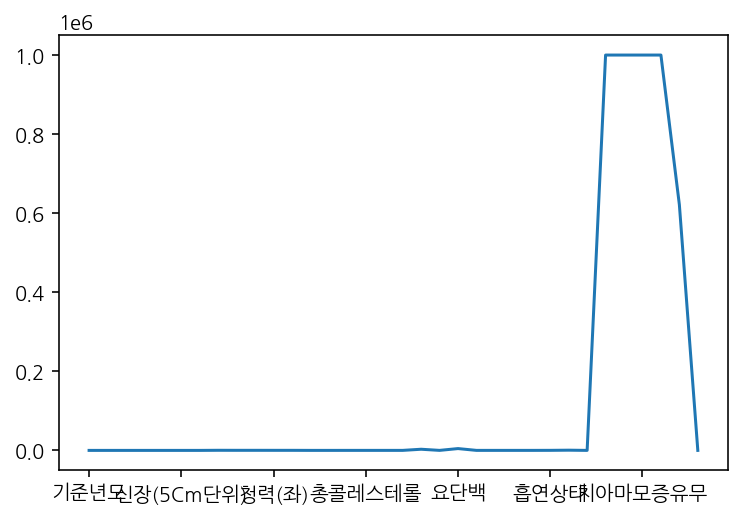

In [15]:
null_count.plot()

<AxesSubplot:>

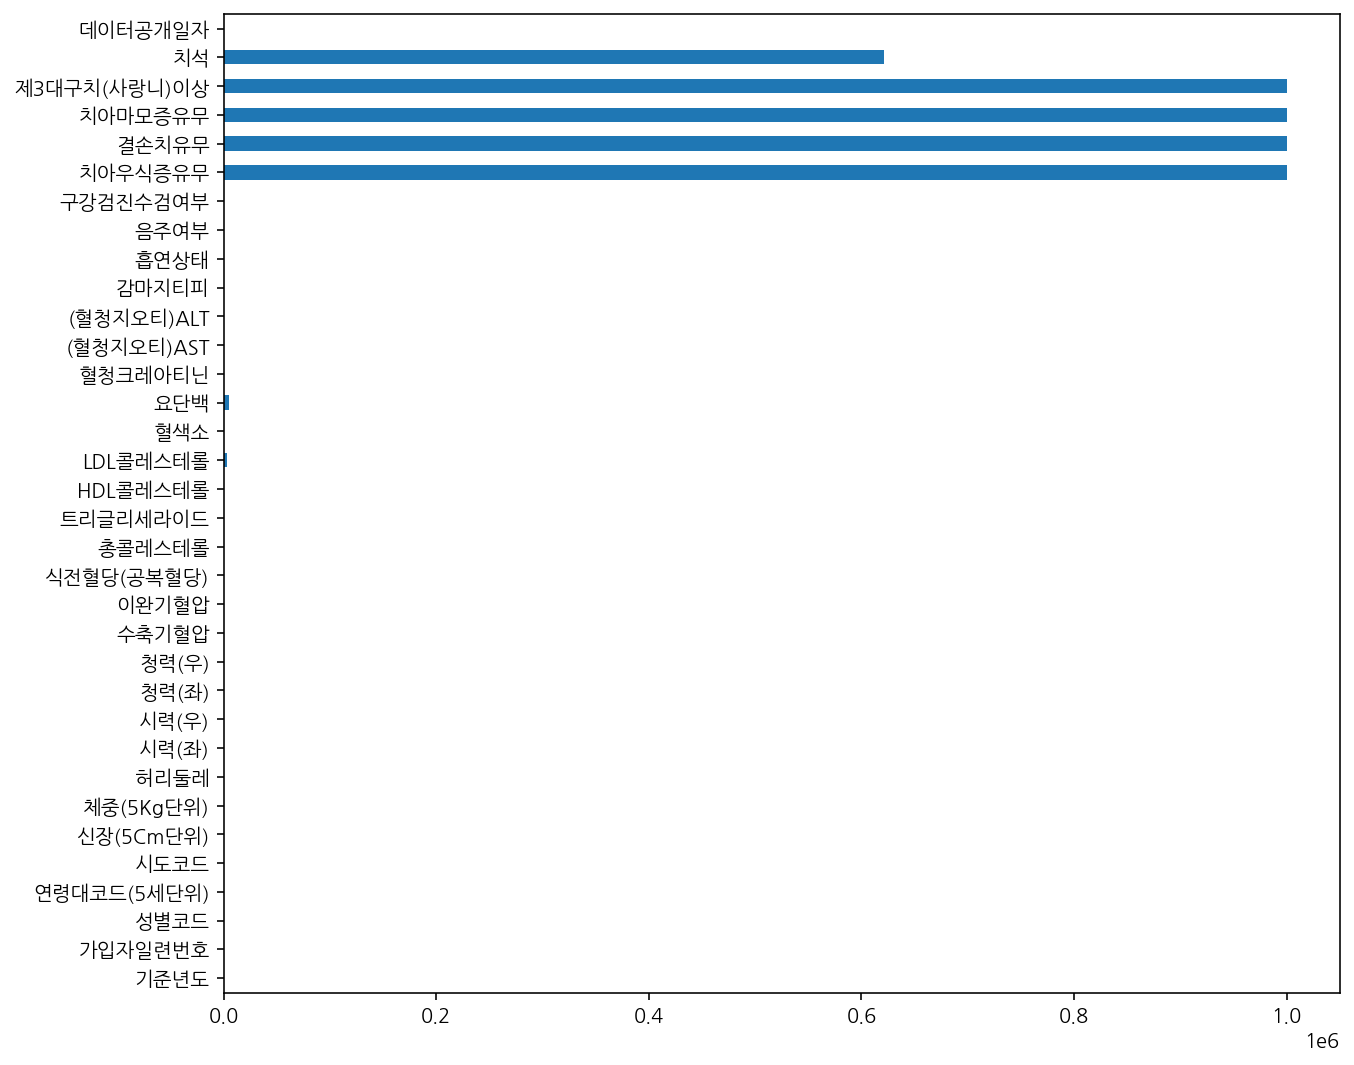

In [16]:
null_count.plot.barh(figsize=(10, 9))

In [17]:
df["(혈청지오티)AST"]

0         21.0
1         20.0
2         47.0
3         29.0
4         19.0
          ... 
999995    26.0
999996    14.0
999997    30.0
999998    21.0
999999    24.0
Name: (혈청지오티)AST, Length: 1000000, dtype: float64

In [18]:
df[["(혈청지오티)ALT","(혈청지오티)AST"]]

(혈청지오티)ALT  (혈청지오티)AST
0             35.0        21.0
1             36.0        20.0
2             32.0        47.0
3             34.0        29.0
4             12.0        19.0
...            ...         ...
999995        36.0        26.0
999996        17.0        14.0
999997        27.0        30.0
999998        14.0        21.0
999999        43.0        24.0

[1000000 rows x 2 columns]

In [19]:
df["(혈청지오티)AST"].head()

0    21.0
1    20.0
2    47.0
3    29.0
4    19.0
Name: (혈청지오티)AST, dtype: float64

In [20]:
df[["(혈청지오티)ALT","(혈청지오티)AST"]].head()

(혈청지오티)ALT  (혈청지오티)AST
0        35.0        21.0
1        36.0        20.0
2        32.0        47.0
3        34.0        29.0
4        12.0        19.0

In [21]:
df[["(혈청지오티)ALT","(혈청지오티)AST"]].describe()

(혈청지오티)ALT     (혈청지오티)AST
count  999958.000000  999959.000000
mean       25.749509      25.994671
std        26.294770      23.587469
min         1.000000       1.000000
25%        15.000000      19.000000
50%        20.000000      23.000000
75%        29.000000      28.000000
max      7210.000000    9999.000000

In [22]:
df["성별코드"].value_counts()

1    530410
2    469590
Name: 성별코드, dtype: int64

In [23]:
df.groupby(["성별코드"]).mean()

기준년도        가입자일련번호  연령대코드(5세단위)       시도코드   신장(5Cm단위)  체중(5Kg단위)  \
성별코드                                                                         
1     2017.0  499656.610053    10.308458  34.098773  168.537858  70.120963   
2     2017.0  500388.929624    10.773935  33.238046  155.101397  55.528972   

           허리둘레     시력(좌)     시력(우)     청력(좌)  ...       요단백   혈청크레아티닌  \
성별코드                                           ...                       
1     85.079026  1.036886  1.035752  1.032173  ...  1.102797  0.973770   
2     76.883707  0.916758  0.912829  1.031174  ...  1.084932  0.736112   

      (혈청지오티)AST  (혈청지오티)ALT      감마지티피      흡연상태  치아우식증유무  결손치유무  치아마모증유무  \
성별코드                                                                         
1      28.060949   30.635680  49.445130  2.062924      NaN    NaN      NaN   
2      23.660739   20.230379  23.335241  1.093455      NaN    NaN      NaN   

      제3대구치(사랑니)이상  
성별코드                
1              NaN  
2              NaN  

[2 rows x 29 columns]

In [24]:
df.groupby(["성별코드"]).count()

기준년도  가입자일련번호  연령대코드(5세단위)    시도코드  신장(5Cm단위)  체중(5Kg단위)    허리둘레  \
성별코드                                                                       
1     530410   530410       530410  530410     530410     530410  530393   
2     469590   469590       469590  469590     469590     469590  469341   

       시력(좌)   시력(우)   청력(좌)  ...   감마지티피    흡연상태    음주여부  구강검진수검여부  치아우식증유무  \
성별코드                          ...                                              
1     530337  530338  530346  ...  530391  530367  530199    530410        0   
2     469480  469473  469496  ...  469567  469489  469265    469590        0   

      결손치유무  치아마모증유무  제3대구치(사랑니)이상      치석  데이터공개일자  
성별코드                                                 
1         0        0             0  215904   530410  
2         0        0             0  162674   469590  

[2 rows x 33 columns]

In [25]:
df.groupby(["성별코드"])["가입자일련번호"].count()

성별코드
1    530410
2    469590
Name: 가입자일련번호, dtype: int64

In [26]:
df.groupby(["성별코드", "음주여부"])["가입자일련번호"].count()

성별코드  음주여부
1     N       173612
      Y       356587
2     N       326827
      Y       142438
Name: 가입자일련번호, dtype: int64

In [27]:
df.groupby(["성별코드", "음주여부"])["감마지티피"].describe()

count       mean        std  min   25%   50%   75%    max
성별코드 음주여부                                                              
1    N     173604.0  34.739868  37.606197  1.0  18.0  25.0  38.0  999.0
     Y     356576.0  56.610981  68.851128  1.0  24.0  37.0  63.0  999.0
2    N     326813.0  22.612408  25.203579  1.0  13.0  17.0  24.0  999.0
     Y     142429.0  25.001018  36.725100  1.0  13.0  17.0  25.0  999.0

In [28]:
df.groupby(["성별코드", "음주여부"])["감마지티피"].agg(["count", "mean", "median"])

count       mean  median
성별코드 음주여부                           
1    N     173604  34.739868    25.0
     Y     356576  56.610981    37.0
2    N     326813  22.612408    17.0
     Y     142429  25.001018    17.0

In [29]:
df.pivot

<bound method DataFrame.pivot of         기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg단위)  허리둘레  \
0       2017        1     1            8    43        170         75  90.0   
1       2017        2     1            7    11        180         80  89.0   
2       2017        3     1            9    41        165         75  91.0   
3       2017        4     1           11    48        175         80  91.0   
4       2017        5     1           11    30        165         60  80.0   
...      ...      ...   ...          ...   ...        ...        ...   ...   
999995  2017   999996     1           10    48        175         80  92.1   
999996  2017   999997     1            8    41        170         75  86.0   
999997  2017   999998     2            9    26        155         50  68.0   
999998  2017   999999     1            6    29        175         60  72.0   
999999  2017  1000000     1           11    41        160         70  90.5   

        시력(좌)  시력(우)  ...  감마지

In [30]:
df.pivot_table(index="성별코드", values="가입자일련번호", aggfunc="count")

가입자일련번호
성별코드         
1      530410
2      469590

In [31]:
df.pivot_table(index="음주여부", values="가입자일련번호", aggfunc="count")

가입자일련번호
음주여부         
N      500439
Y      499025

In [32]:
pd.pivot_table(df, index="음주여부", values="감마지티피")

감마지티피
음주여부           
N     26.819650
Y     47.588675

In [33]:
pd.pivot_table(df, index="음주여부", values="감마지티피", aggfunc=["mean", "median"])

mean median
          감마지티피  감마지티피
음주여부                  
N     26.819650   19.0
Y     47.588675   30.0

In [34]:
pd.pivot_table(df, index="음주여부", values="감마지티피", aggfunc="describe")

25%   50%   75%     count    max       mean  min        std
음주여부                                                              
N     14.0  19.0  29.0  500417.0  999.0  26.819650  1.0  30.639714
Y     18.0  30.0  52.0  499005.0  999.0  47.588675  1.0  63.056912

In [35]:
pd.pivot_table(df, index=["음주여부", "성별코드"], values="감마지티피", aggfunc="describe")

25%   50%   75%     count    max       mean  min        std
음주여부 성별코드                                                              
N    1     18.0  25.0  38.0  173604.0  999.0  34.739868  1.0  37.606197
     2     13.0  17.0  24.0  326813.0  999.0  22.612408  1.0  25.203579
Y    1     24.0  37.0  63.0  356576.0  999.0  56.610981  1.0  68.851128
     2     13.0  17.0  25.0  142429.0  999.0  25.001018  1.0  36.725100

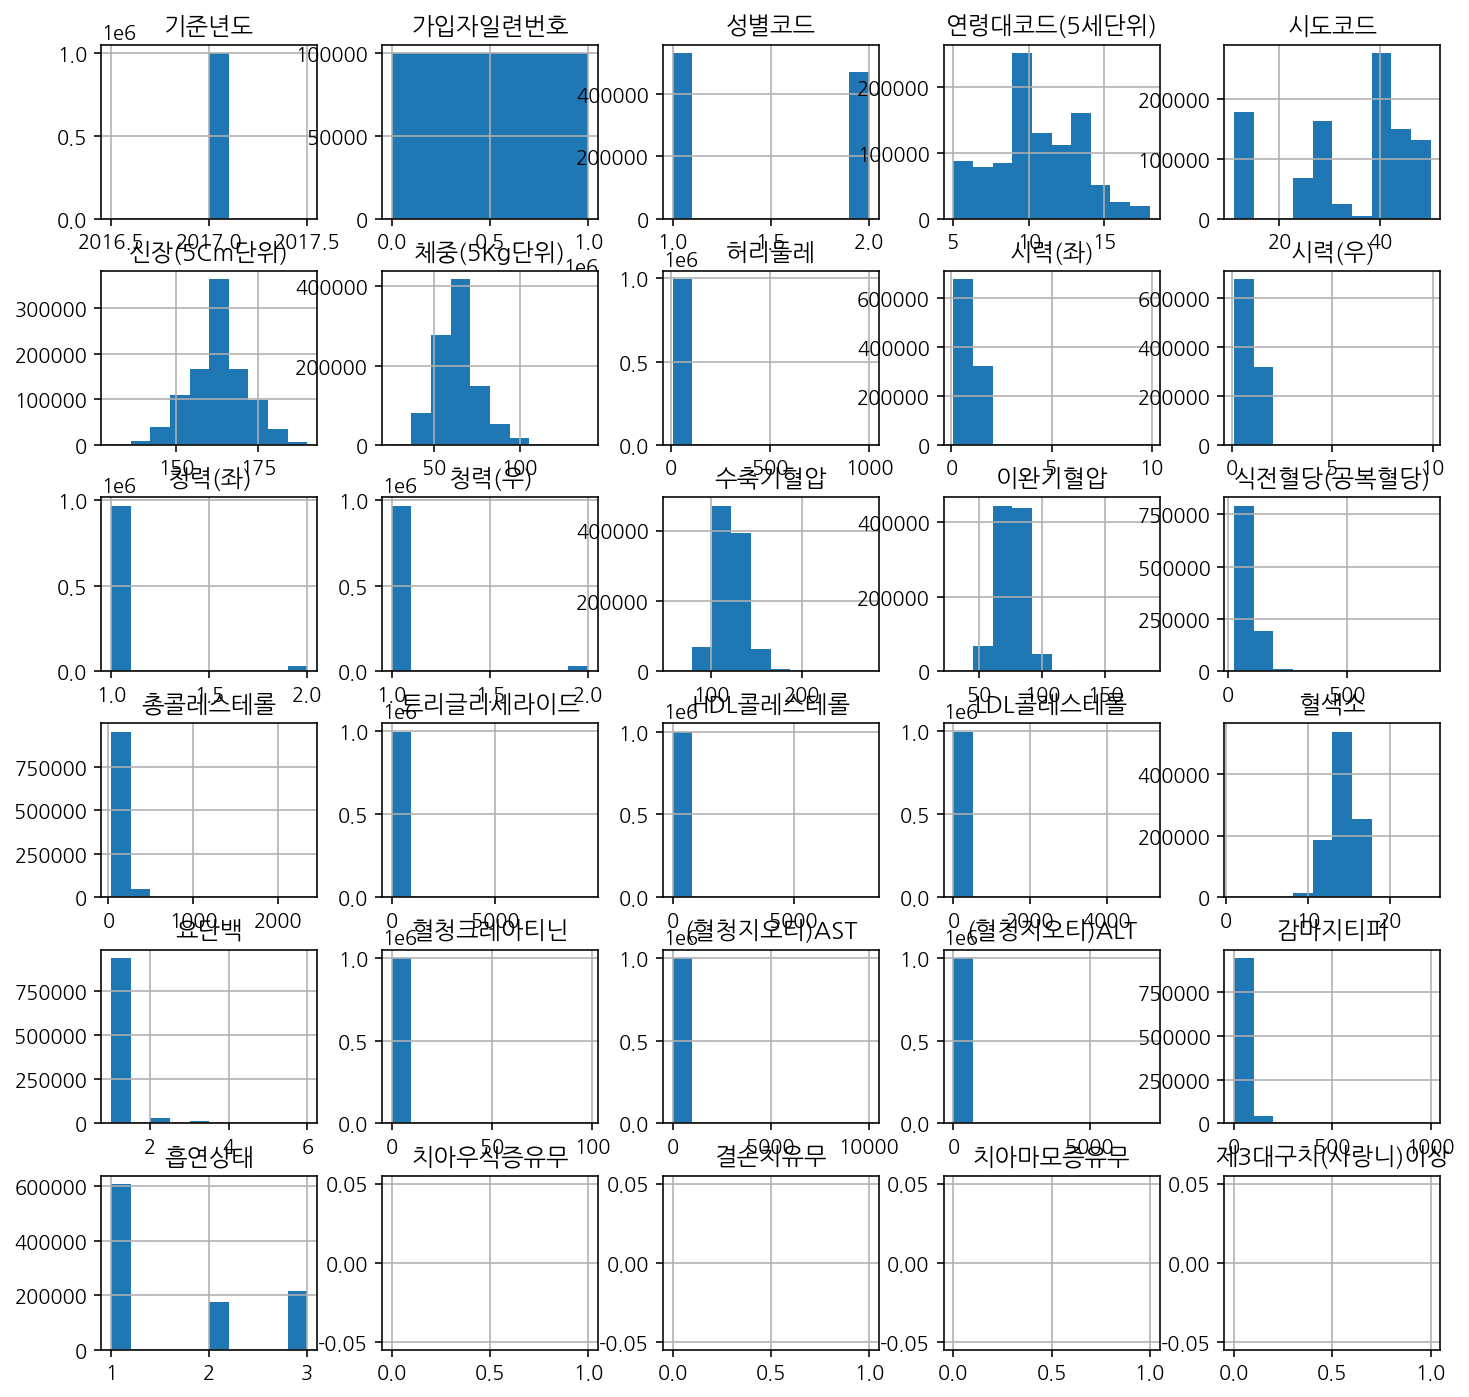

In [36]:
h = df.hist(figsize=(12, 12))

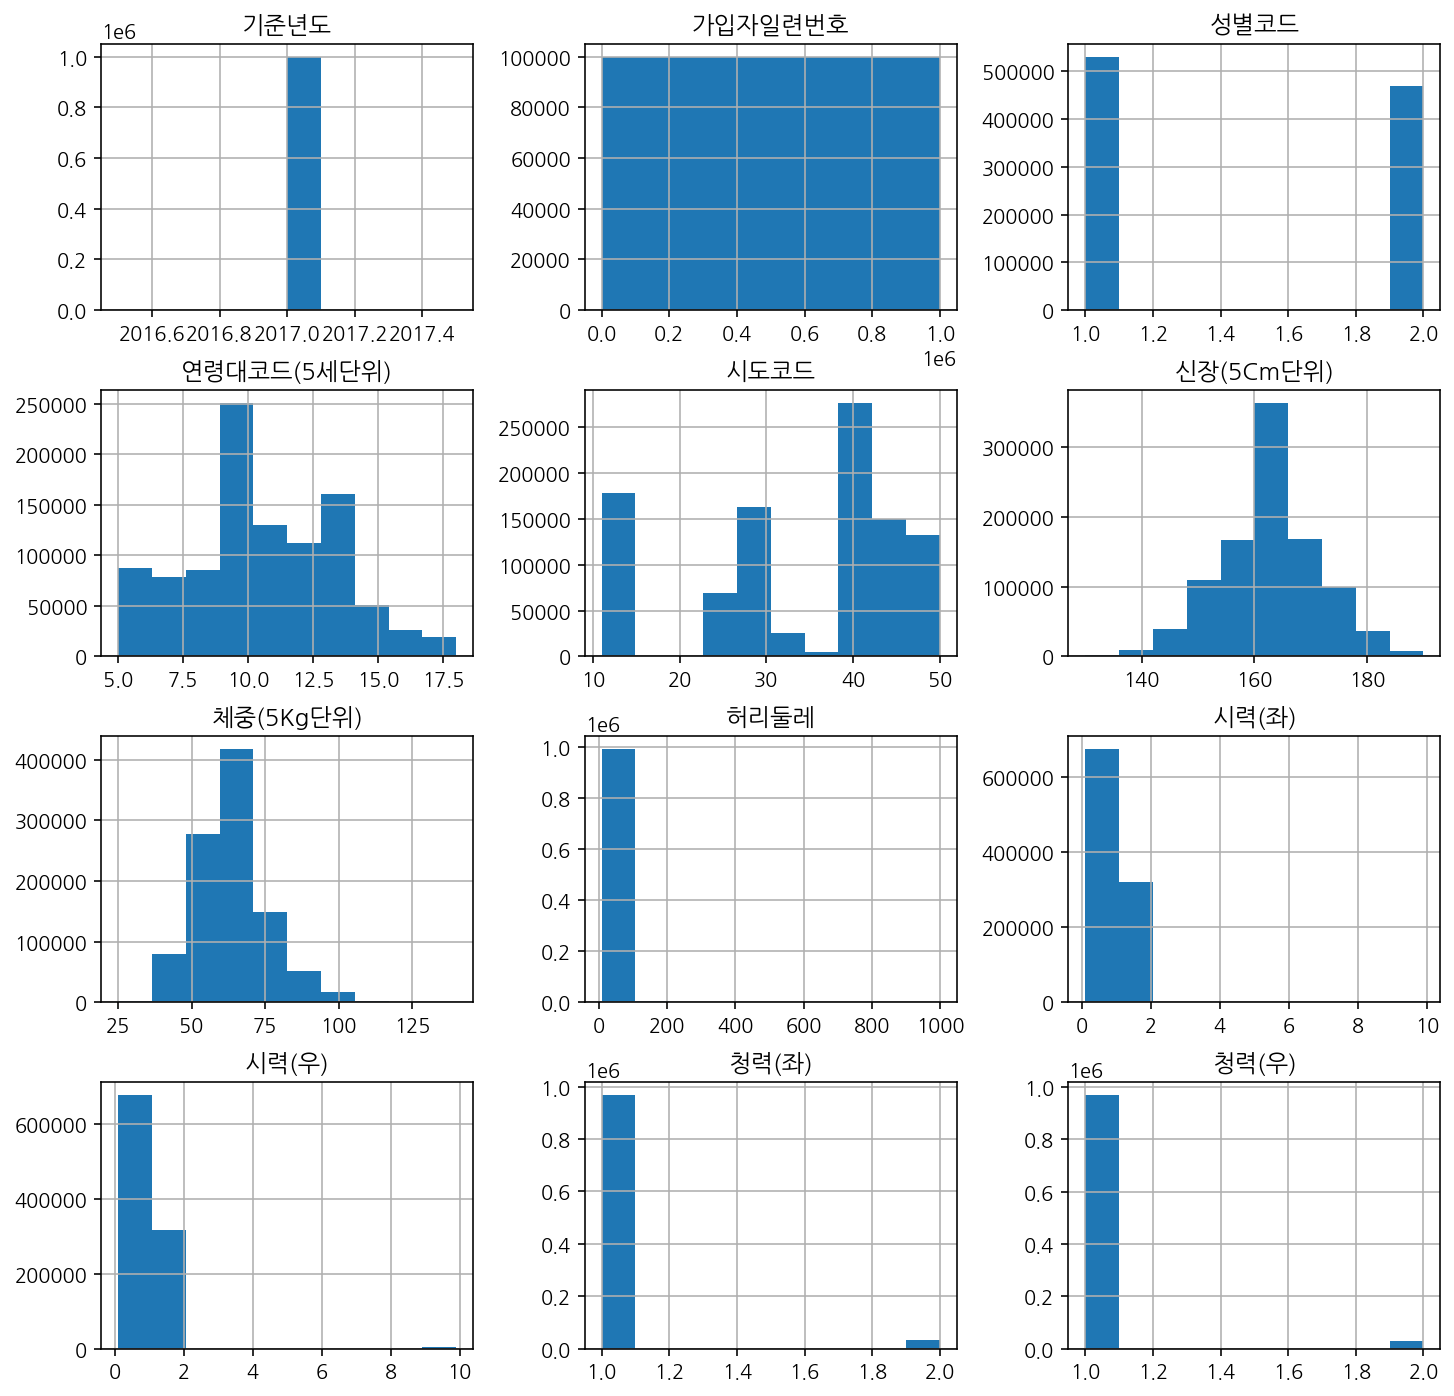

In [37]:
h= df.iloc[:, :12].hist(figsize=(12, 12))

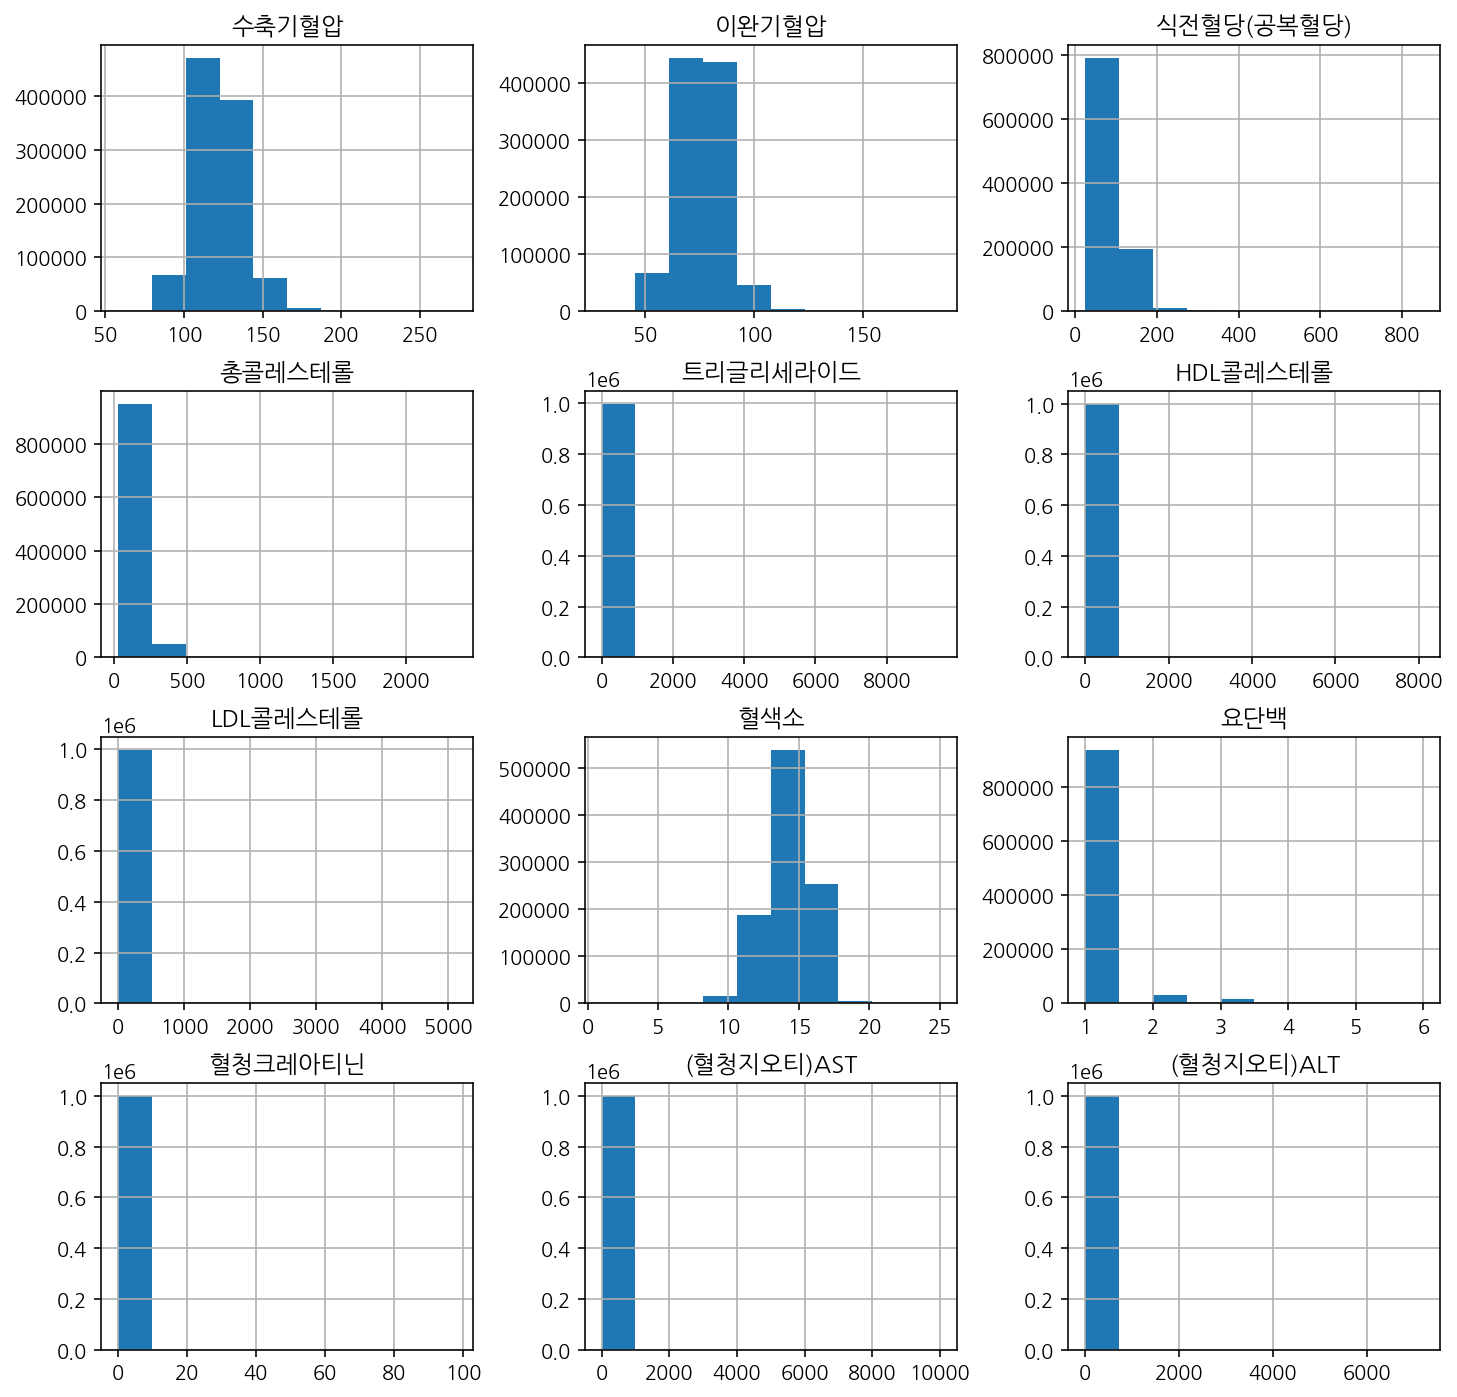

In [38]:
h = df.iloc[:, 12:24].hist(figsize=(12, 12))

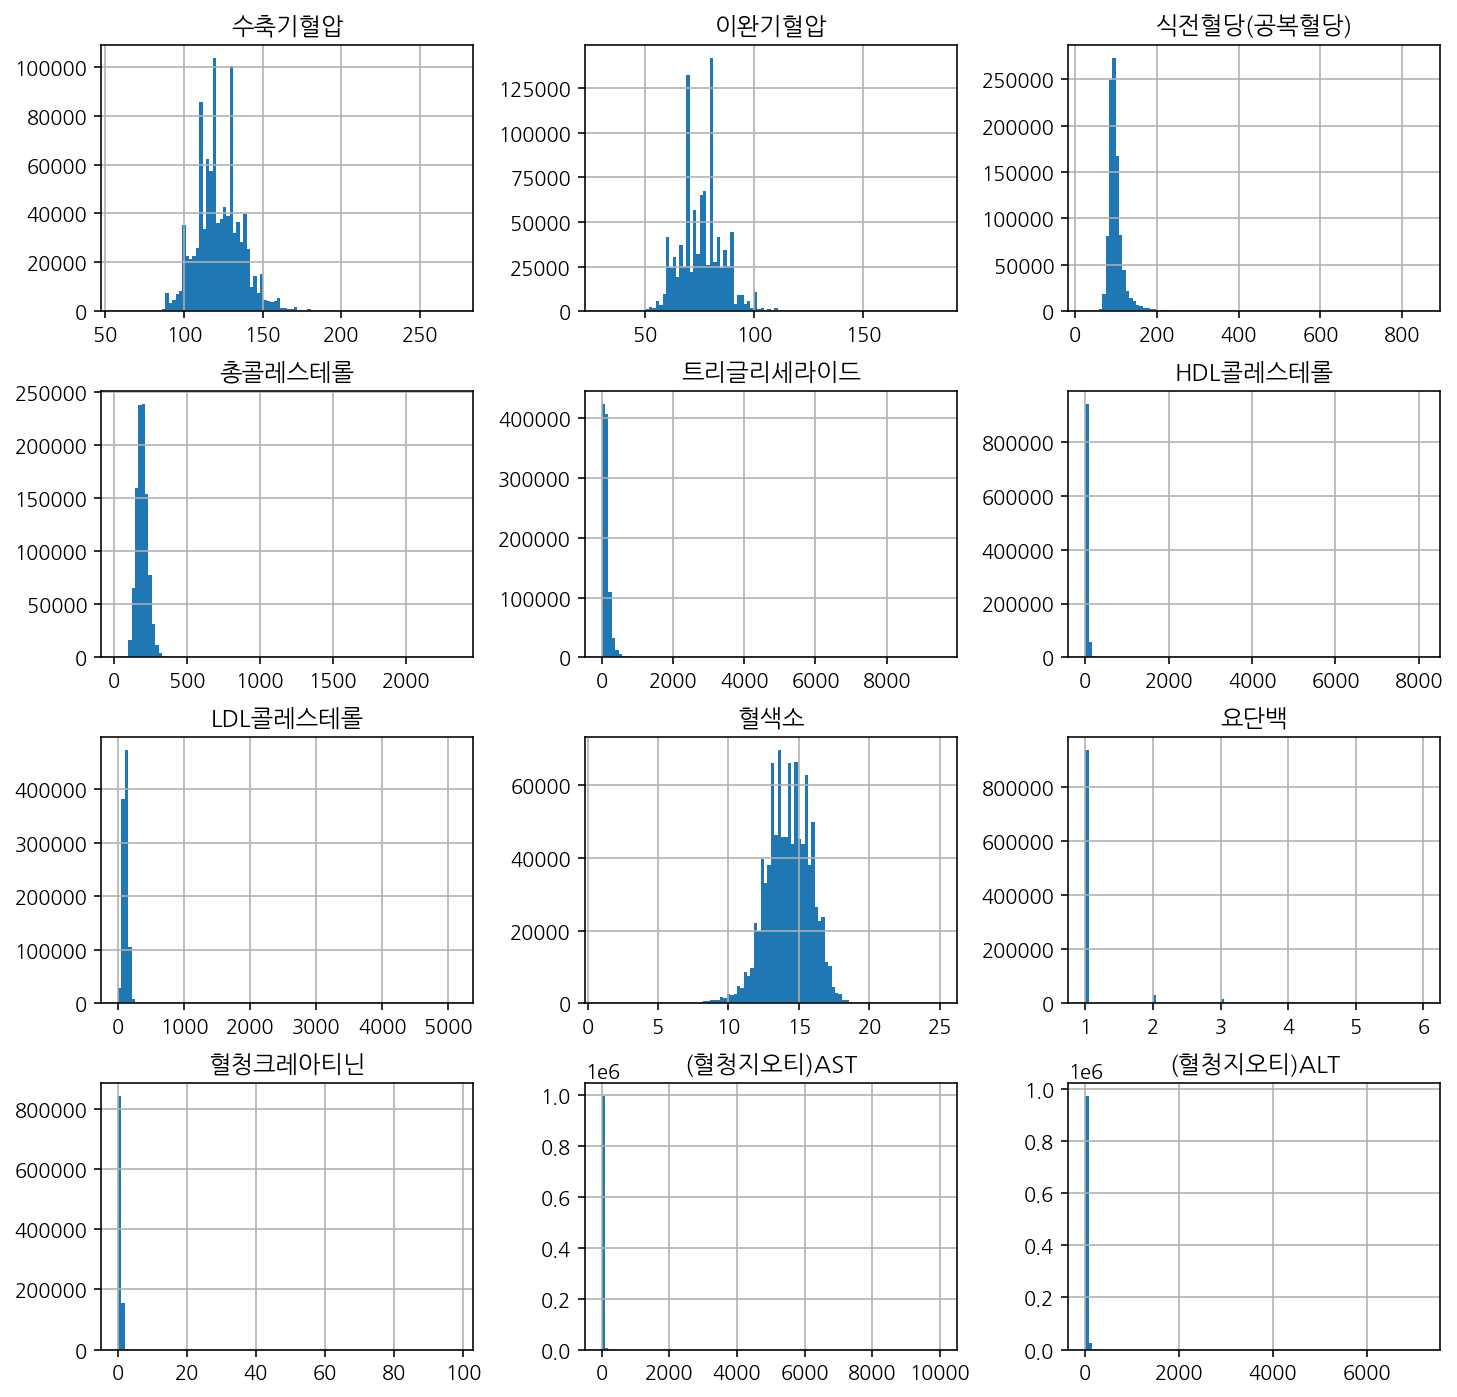

In [39]:
h = df.iloc[:, 12:24].hist(figsize=(12, 12), bins=100)

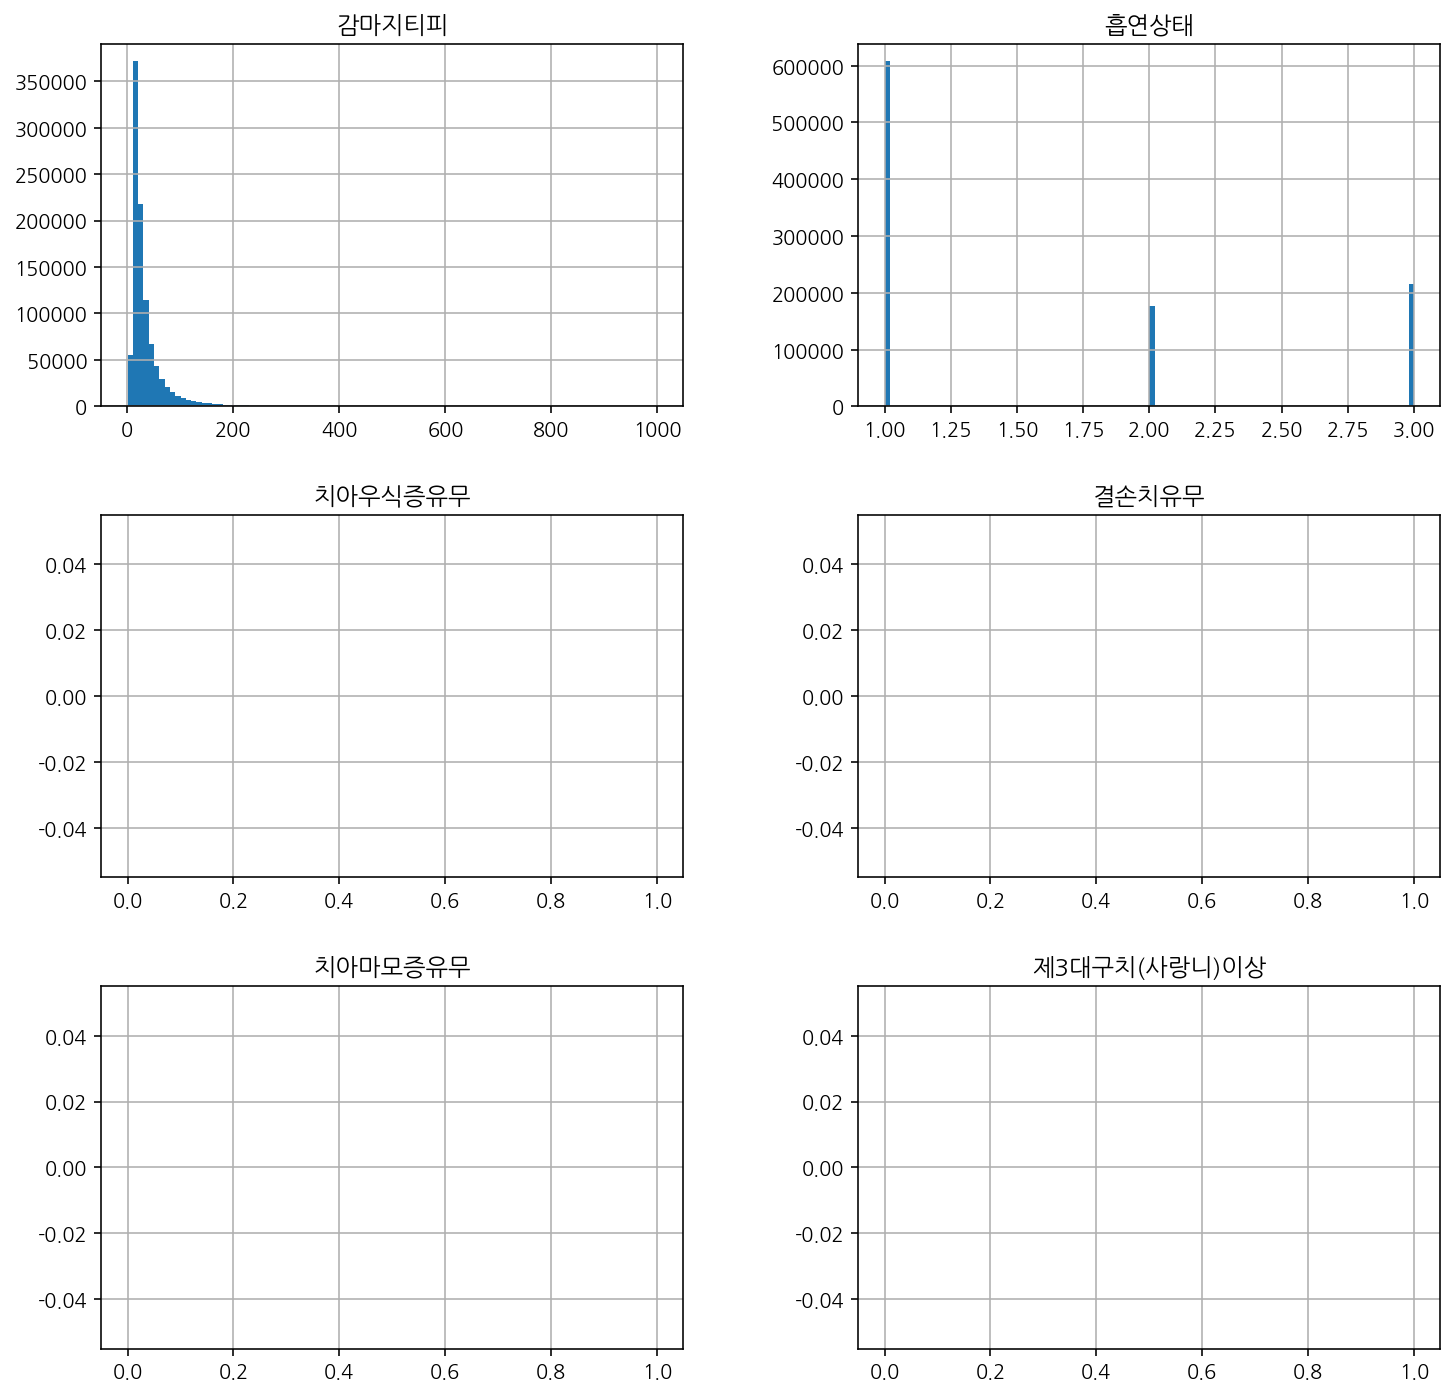

In [40]:
h = df.iloc[:, 24:].hist(figsize=(12, 12), bins=100)

In [41]:
df_sample = df.sample(1000, random_state=1)

<AxesSubplot:>

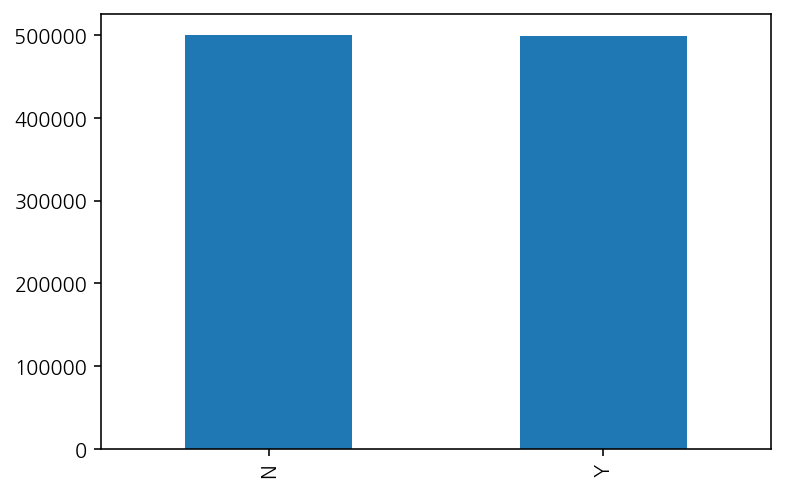

In [42]:
df["음주여부"].value_counts().plot.bar()

<AxesSubplot:xlabel='음주여부', ylabel='count'>

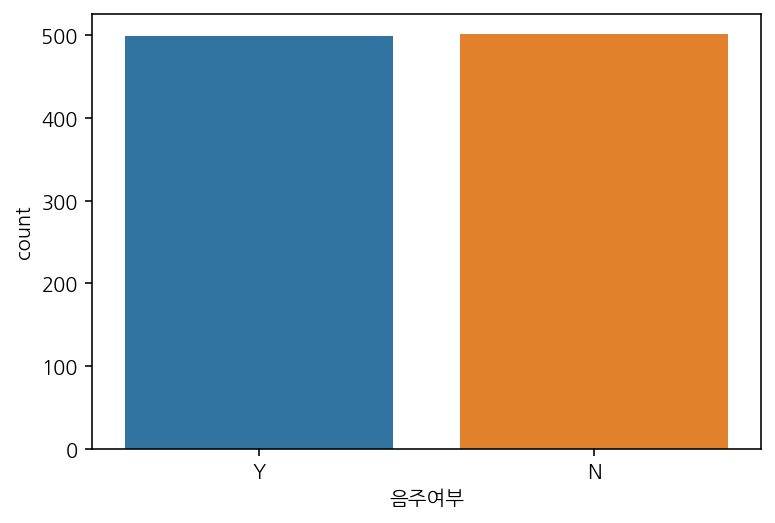

In [43]:
sns.countplot(x="음주여부", data=df_sample)

<AxesSubplot:xlabel='음주여부', ylabel='count'>

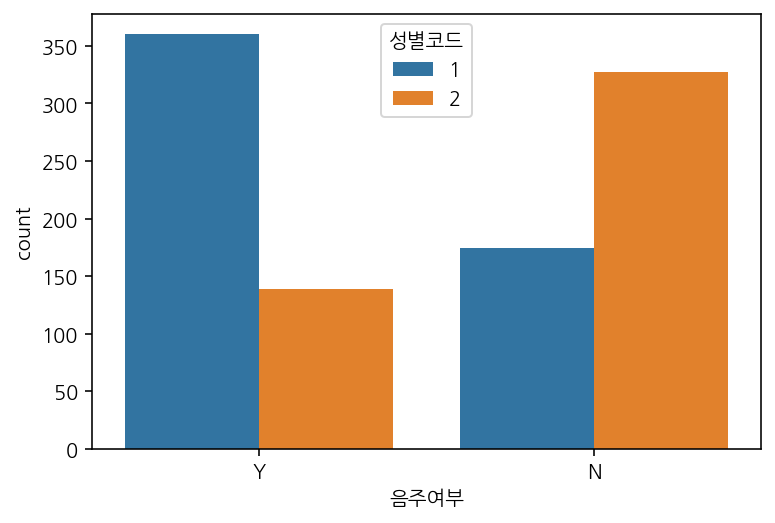

In [44]:
sns.countplot(x="음주여부", data=df_sample, hue="성별코드")

In [45]:
sns.set(font_scale=1.5, font="NanumGothic")
#으로 seaborn에서 옵션 값들이 적용하여 사용할 수 있습니다.

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='count'>

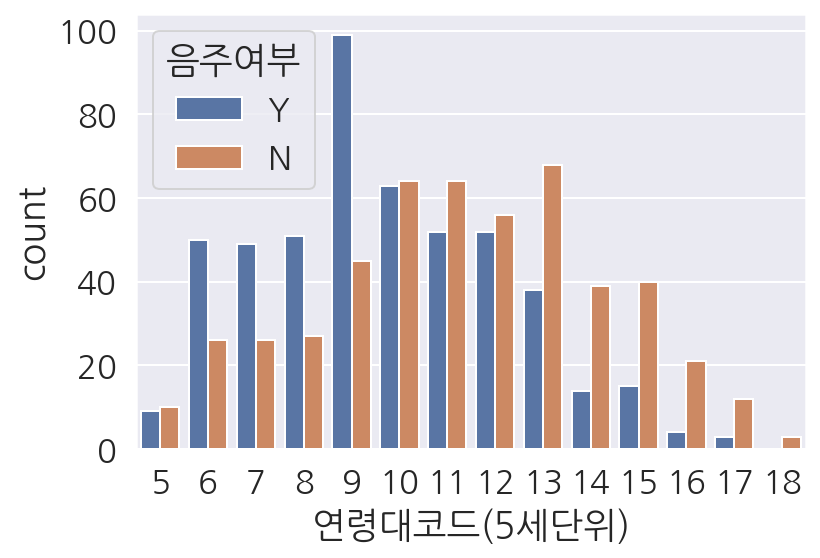

In [46]:
sns.countplot(data=df_sample, x="연령대코드(5세단위)", hue="음주여부")

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='count'>

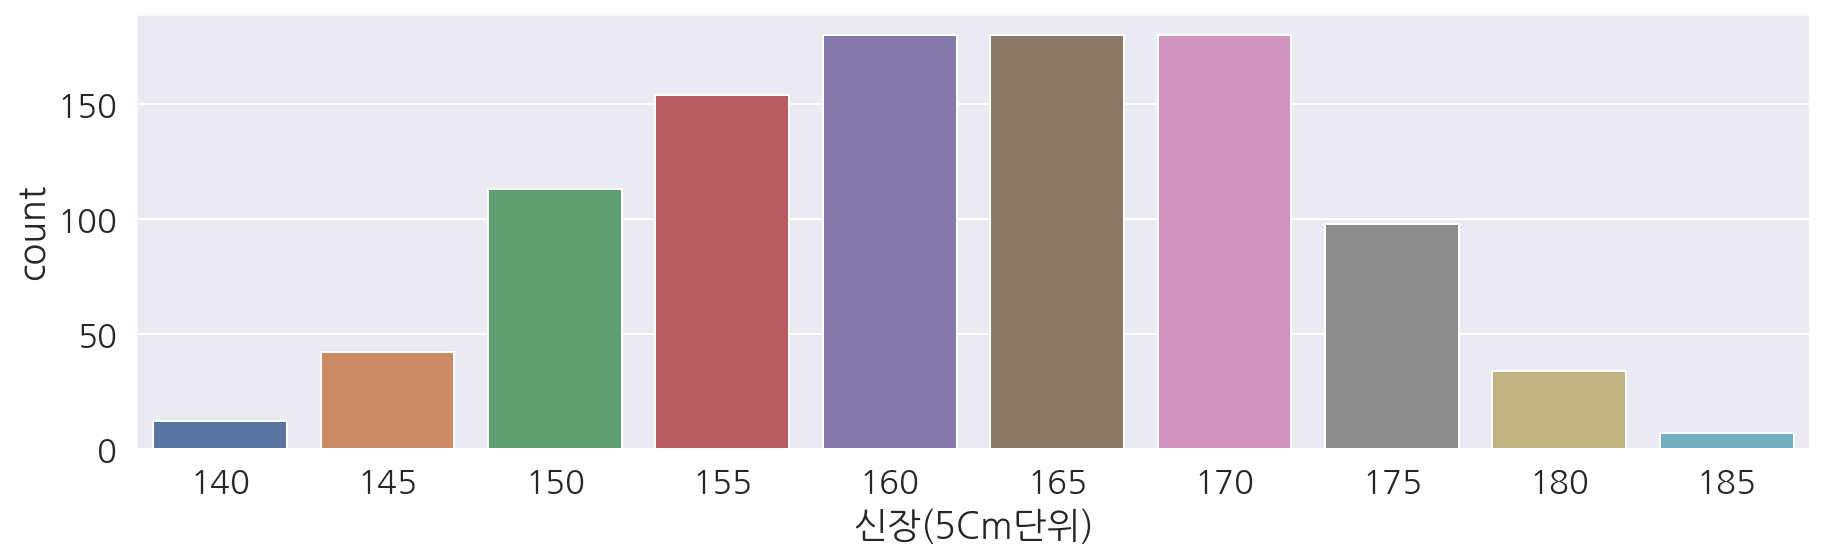

In [47]:
plt.figure(figsize=(15,4))
sns.countplot(data=df_sample, x="신장(5Cm단위)")

<AxesSubplot:xlabel='체중(5Kg단위)', ylabel='count'>

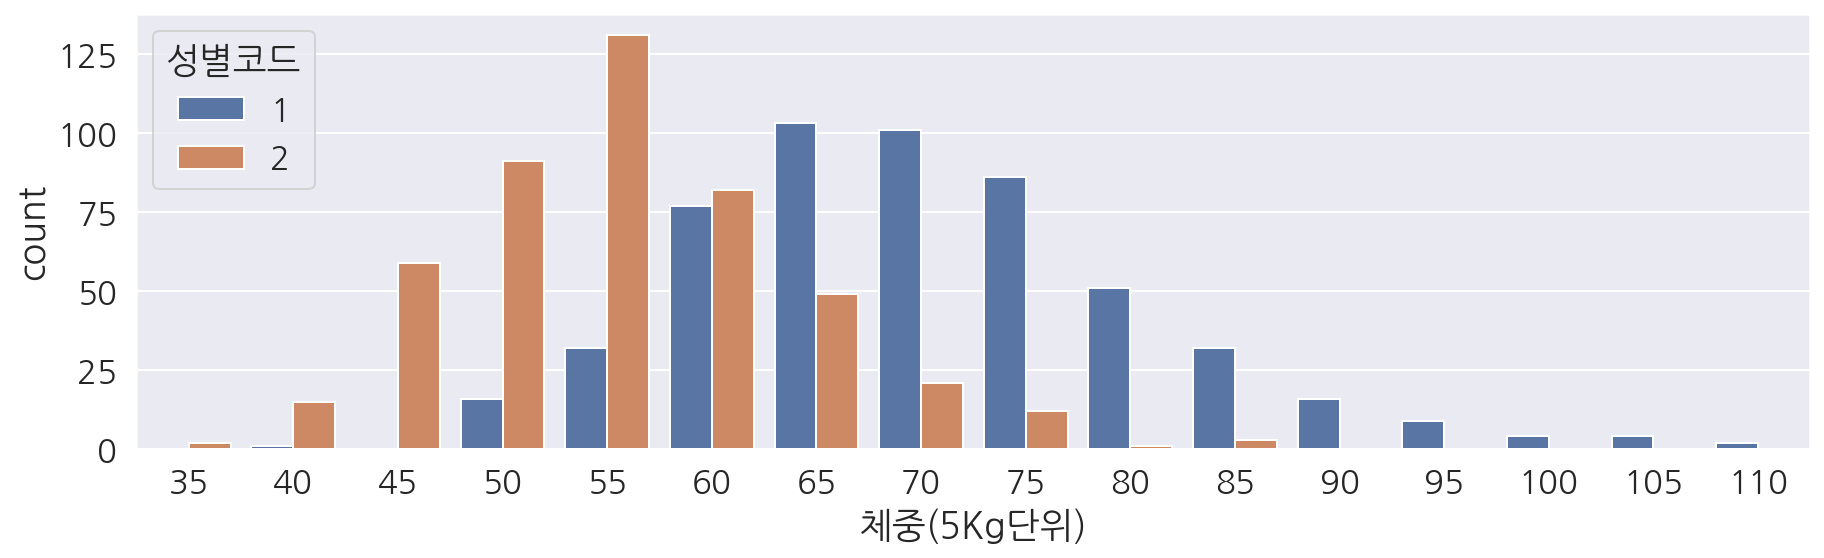

In [48]:
plt.figure(figsize=(15,4))
sns.countplot(data=df_sample, x="체중(5Kg단위)", hue="성별코드")

<AxesSubplot:xlabel='체중(5Kg단위)', ylabel='count'>

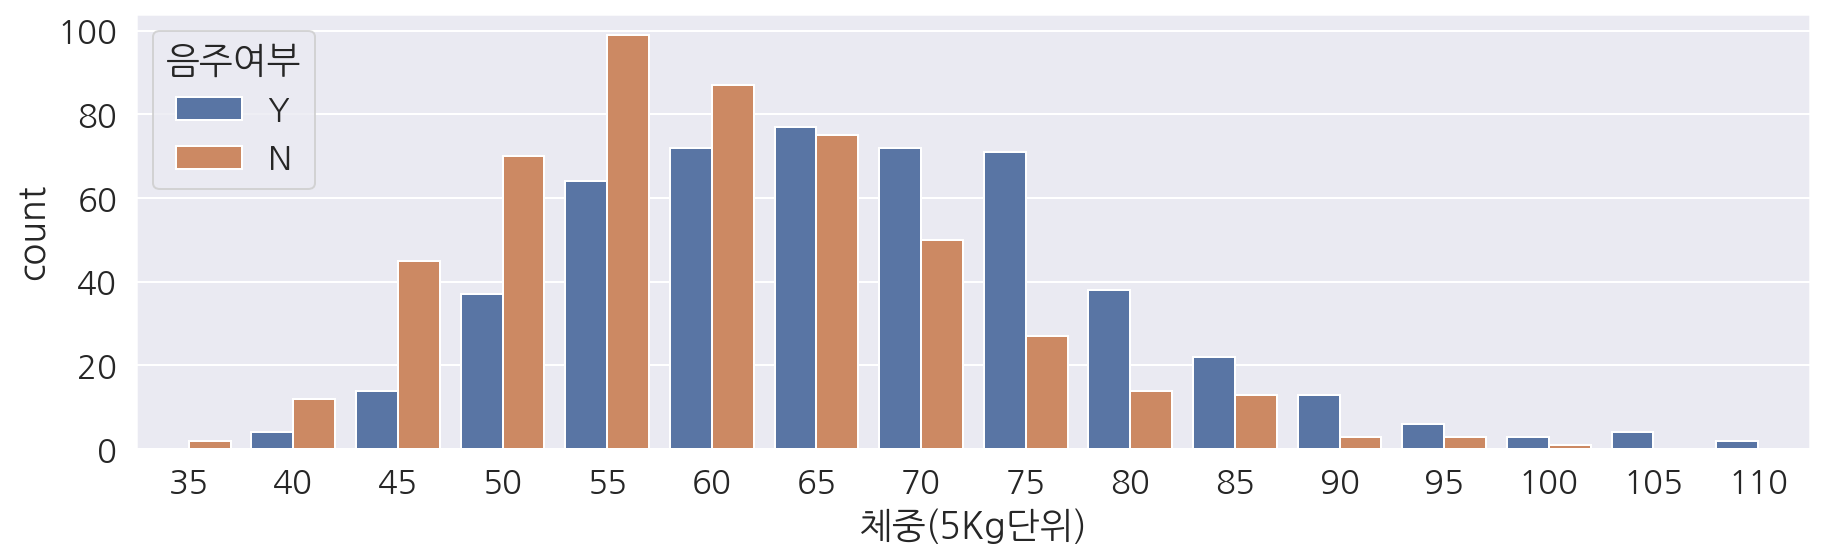

In [49]:
plt.figure(figsize=(15,4))
sns.countplot(data=df_sample, x="체중(5Kg단위)", hue="음주여부")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='총콜레스테롤'>

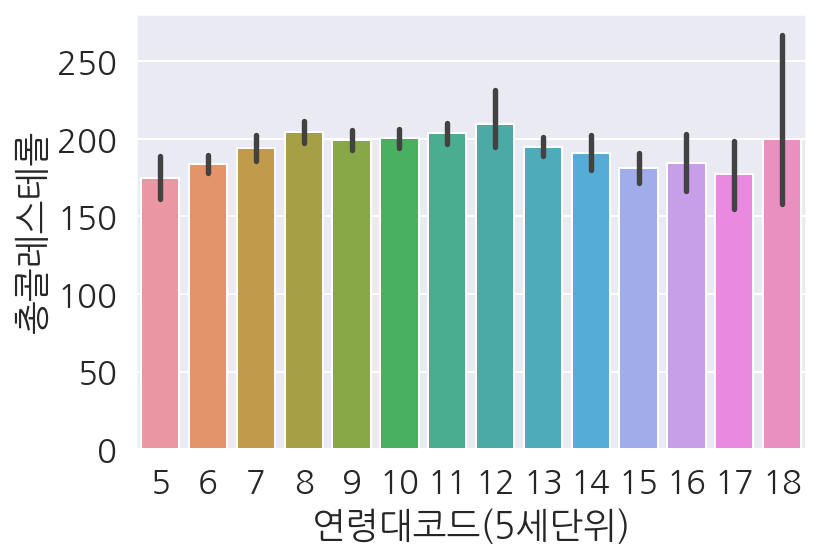

In [50]:
sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="총콜레스테롤")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='총콜레스테롤'>

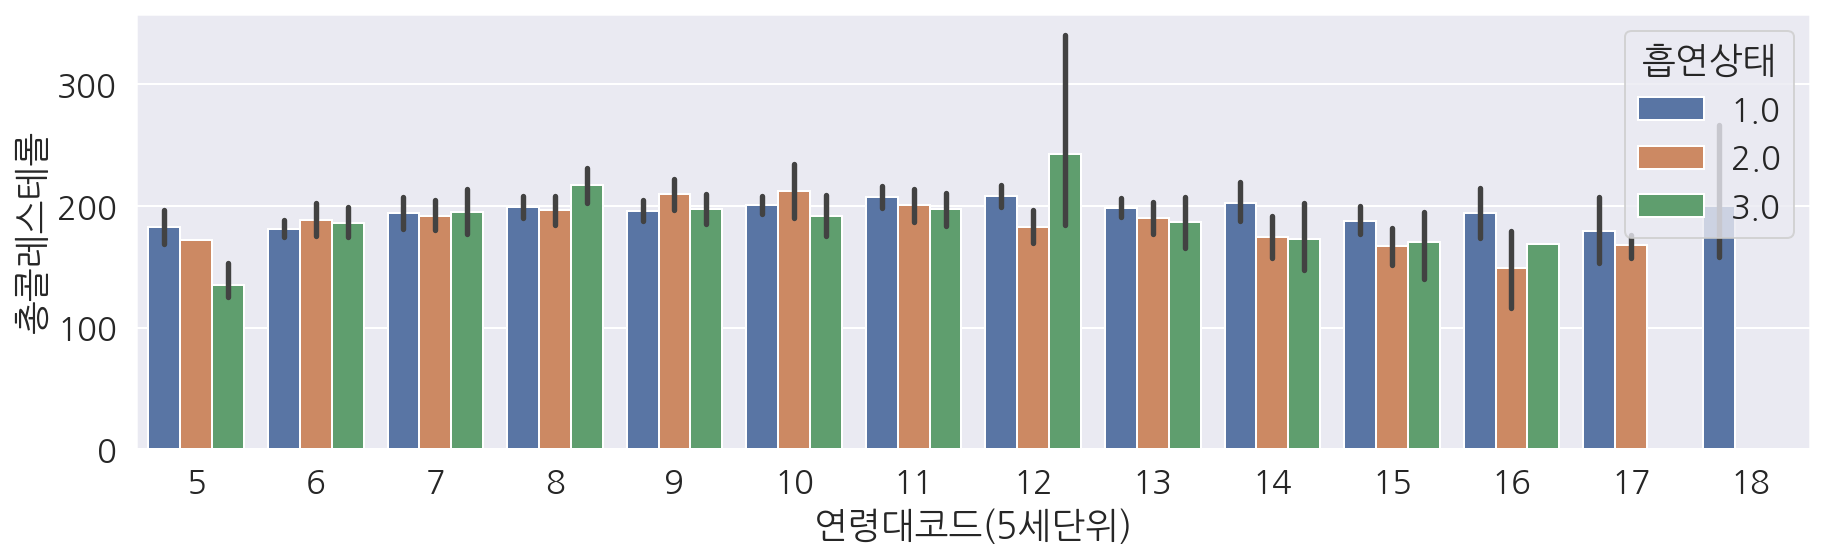

In [52]:
plt.figure(figsize=(15,4))
sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="총콜레스테롤", hue="흡연상태")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='트리글리세라이드'>

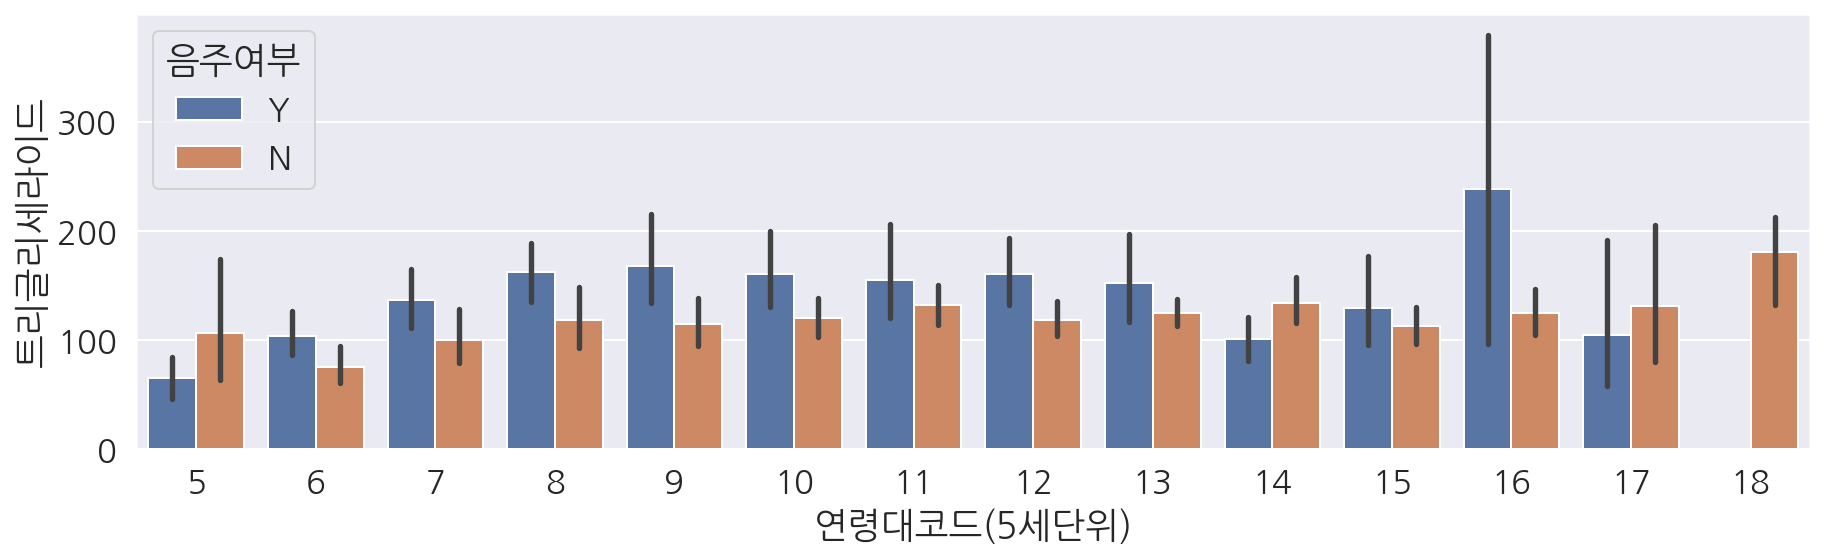

In [54]:
plt.figure(figsize=(15,4))
# ci는 신뢰구간 수준입니다. 95%의 신뢰구간을 지정하고 싶다면 95를 입력합니다.
sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="트리글리세라이드", hue="음주여부", ci=95)

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='트리글리세라이드'>

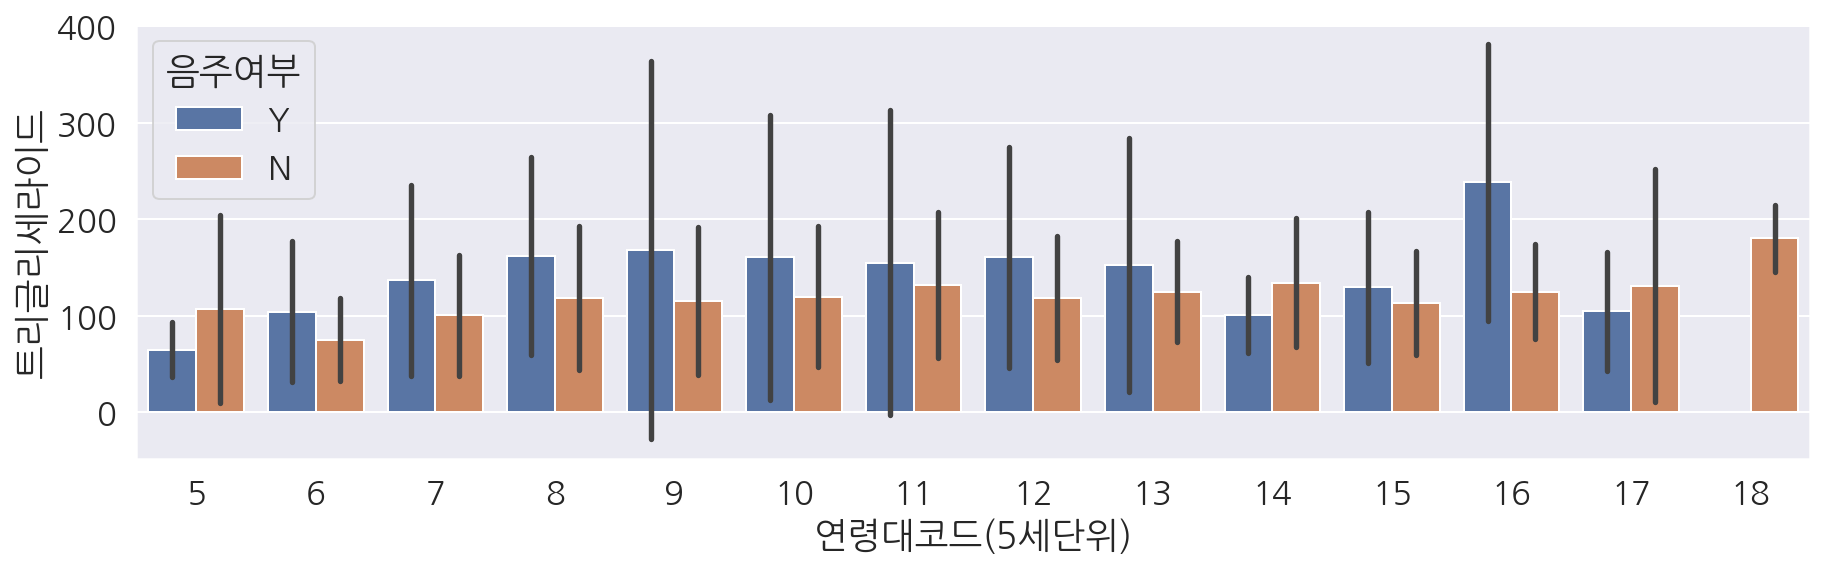

In [57]:
# 음주를 하는 사람이 트리글리세라이드(중성지방수치)가 높은 경향이 있습니다.
plt.figure(figsize=(15,4))
sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="트리글리세라이드", hue="음주여부", ci="sd")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='체중(5Kg단위)'>

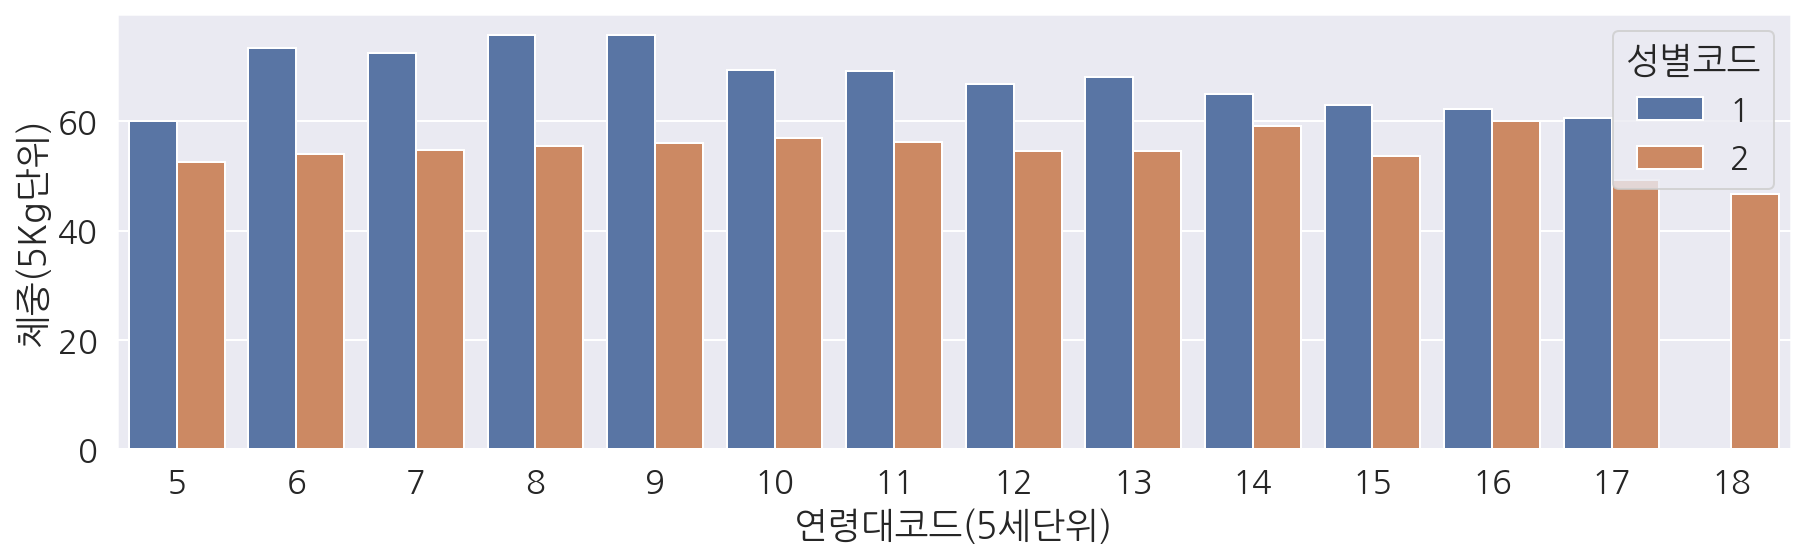

In [61]:
# 신뢰구간을 표시하고 싶지 않다면 None을 설정합니다.
# 나이가 높을수록 체중이 더욱 높다는 사실을 그래프에서 볼 수 있습니다.
plt.figure(figsize=(15,4))
sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="체중(5Kg단위)", hue="성별코드", ci=None)

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='체중(5Kg단위)'>

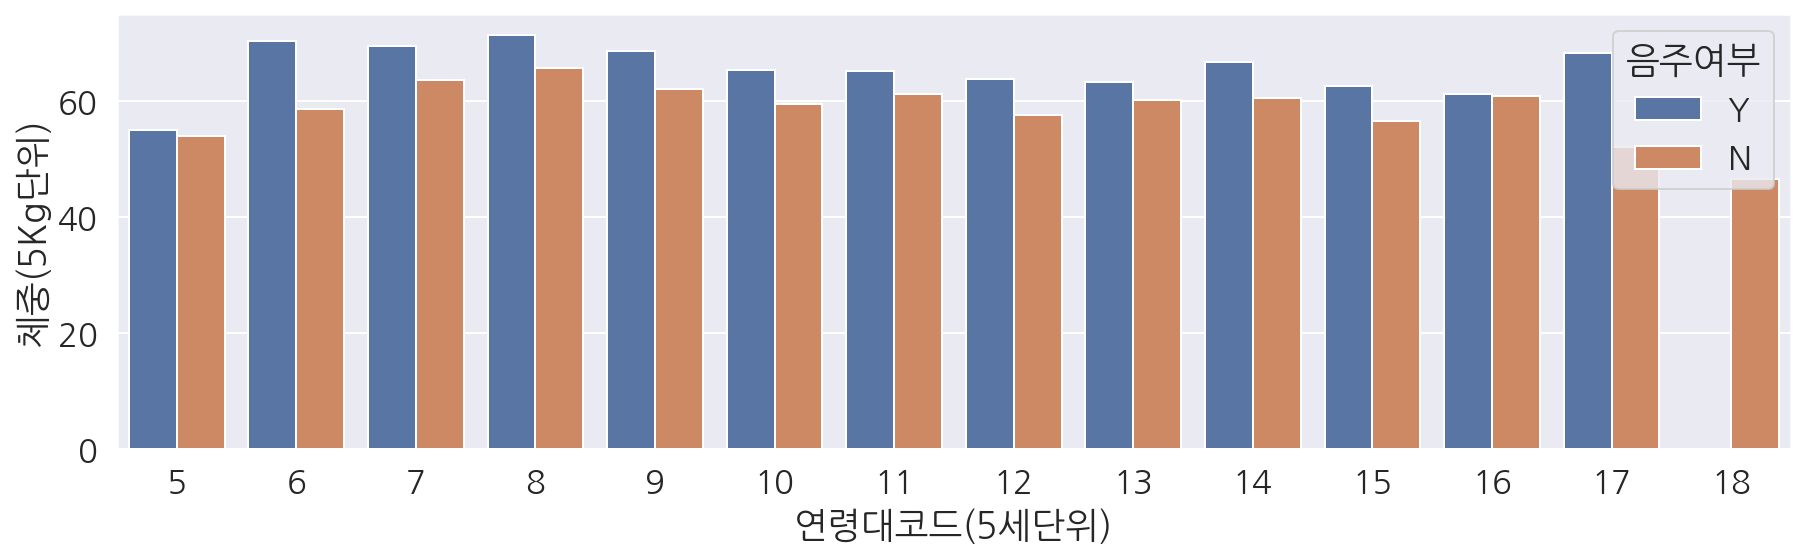

In [62]:
plt.figure(figsize=(15,4))
# 음주를 하는 사람들이 체중이 많이 나가는 경향이 보입니다.
sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="체중(5Kg단위)", hue="음주여부", ci=None)

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='체중(5Kg단위)'>

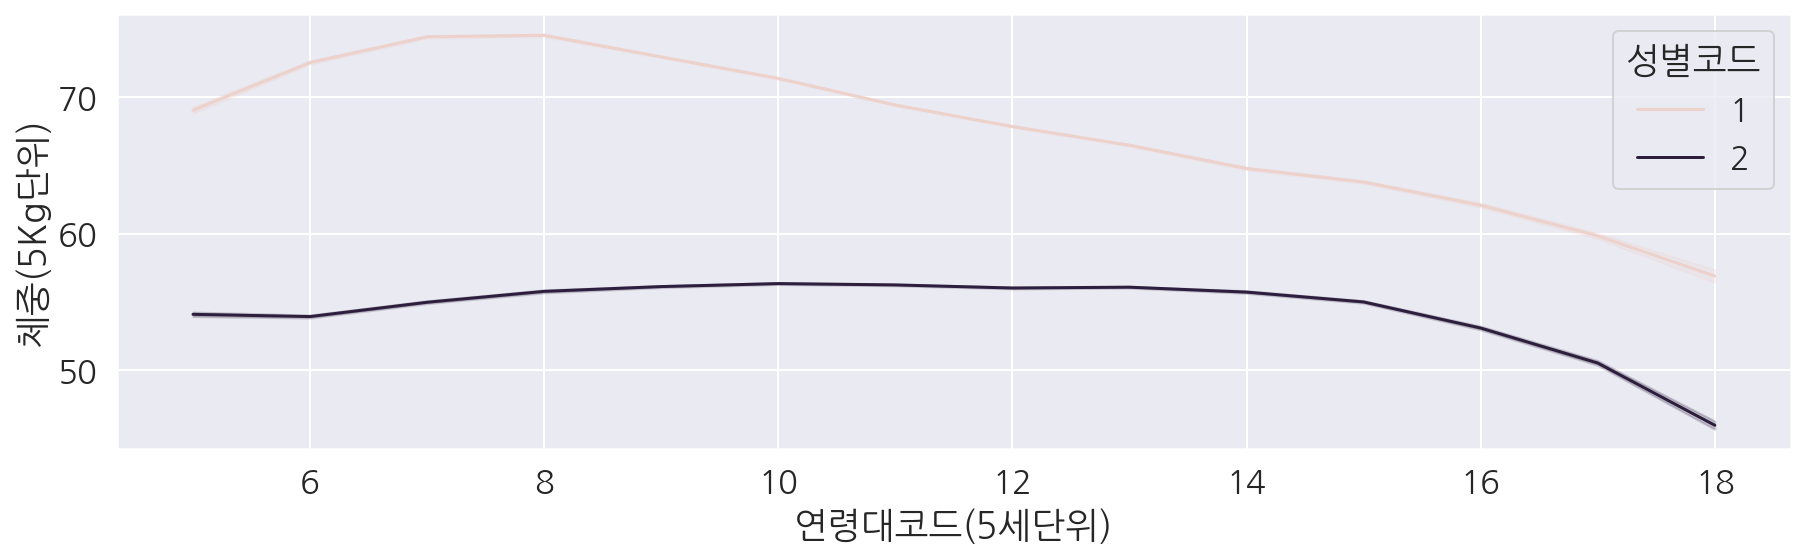

In [74]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df, x="연령대코드(5세단위)", y="체중(5Kg단위)", hue="성별코드")
# 연령대가 높아질수록 체중이 낮아진다는 것을 볼 수 있습니다.
# y축은 평균입니다.
# lineplot은 편차와 신뢰구간을 그림자로 표현합니다. 그래프 뒤쪽에 그림자가 없는 이유는 모수가 적어서 편차를 그릴 게 없기 때문입니다.

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='신장(5Cm단위)'>

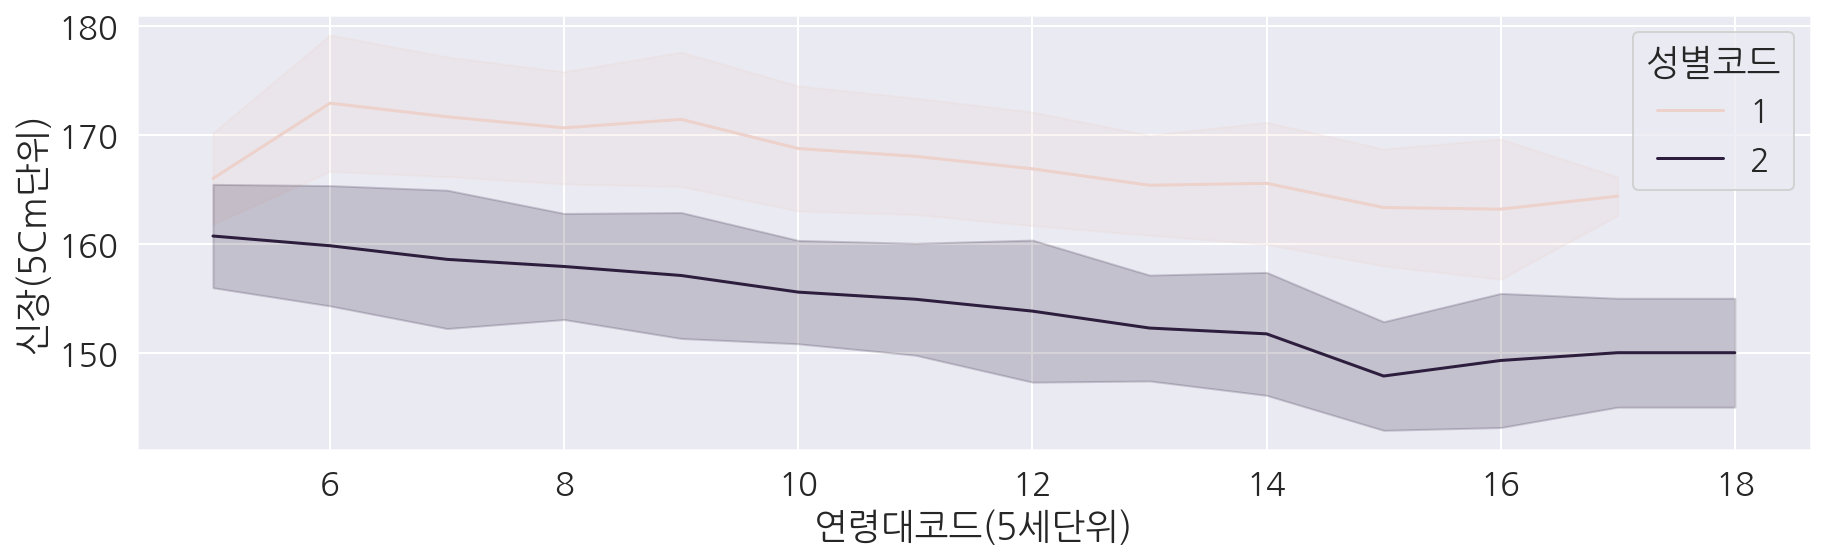

In [75]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df_sample, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="성별코드", ci="sd")
# 나이가 커질수록 신장이 조금씩 작아집니다.

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='신장(5Cm단위)'>

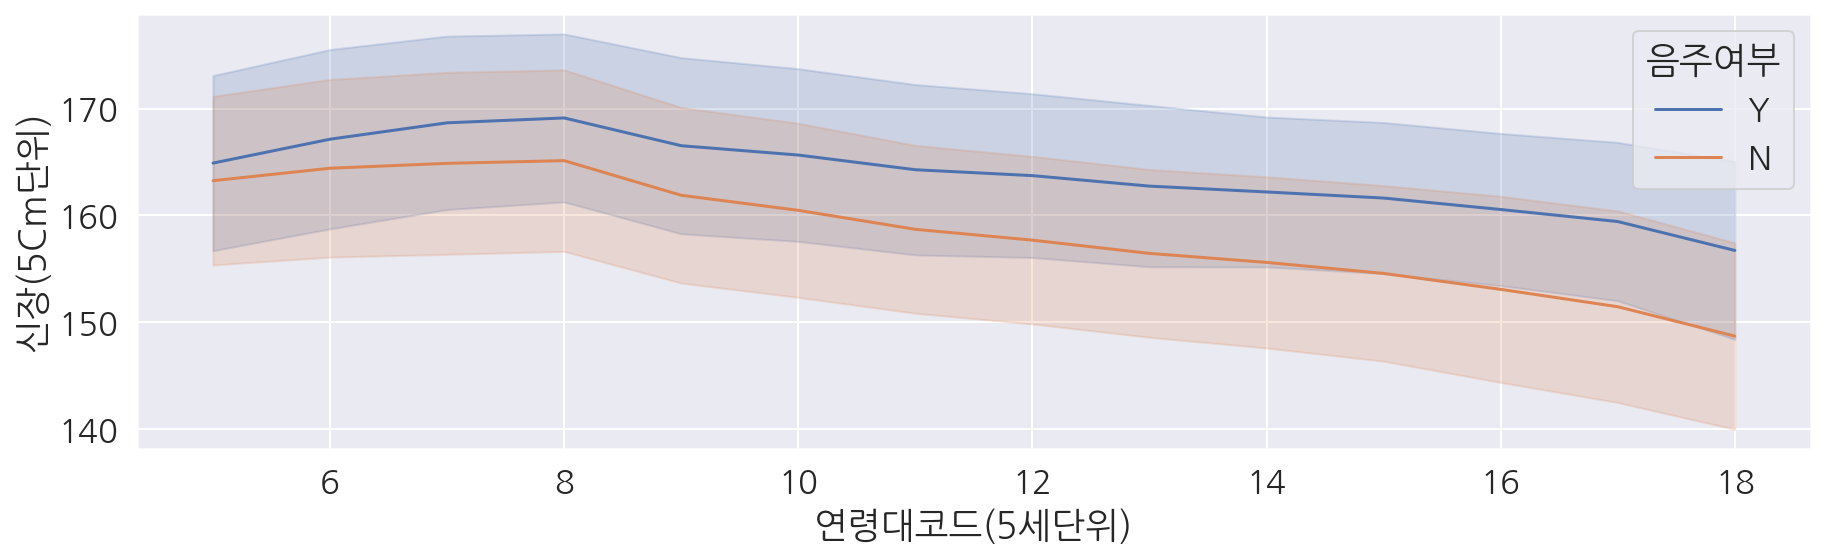

In [76]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="음주여부", ci="sd")
# 키는 음주하고 있는 사람들이 약간 더 큰 편입니다.

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='신장(5Cm단위)'>

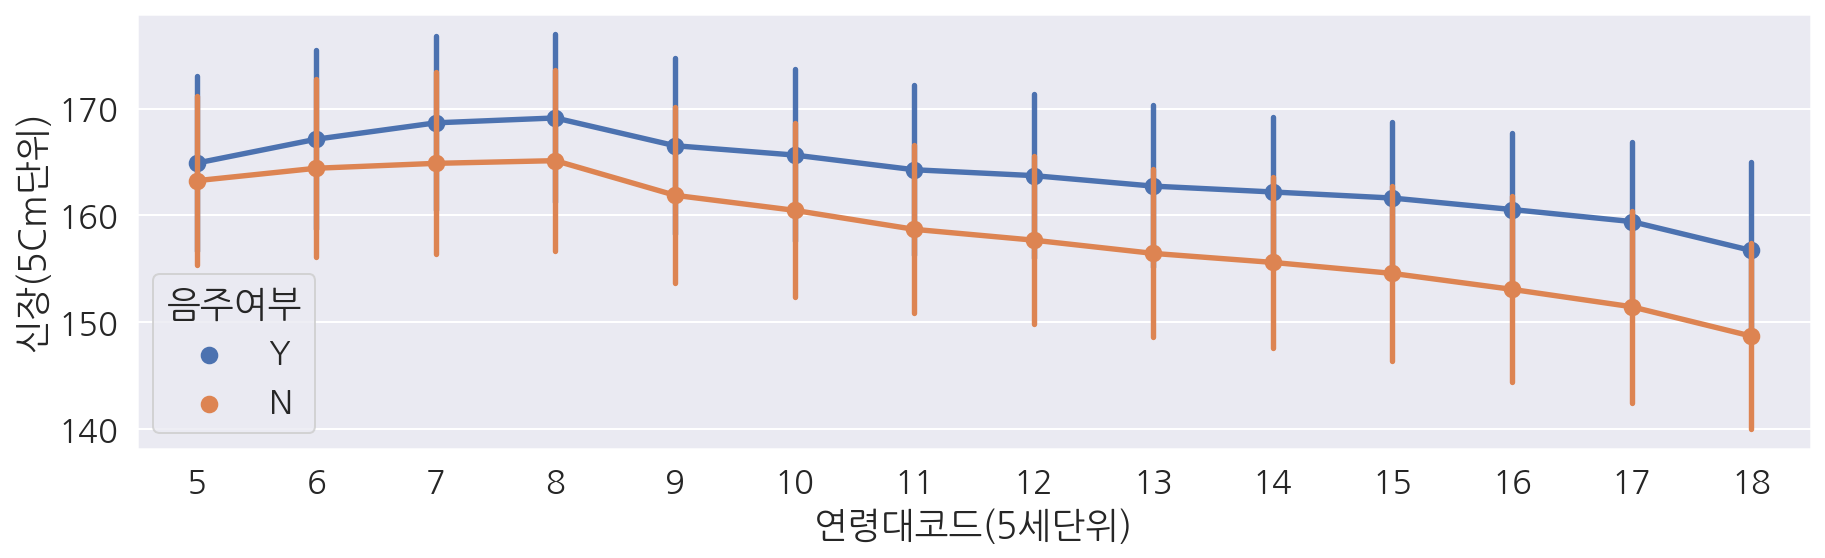

In [77]:
# pointplot은 막대를 통해 편차와 신뢰구간를 표현합니다.
plt.figure(figsize=(15,4))
sns.pointplot(data=df, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="음주여부", ci="sd")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='신장(5Cm단위)'>

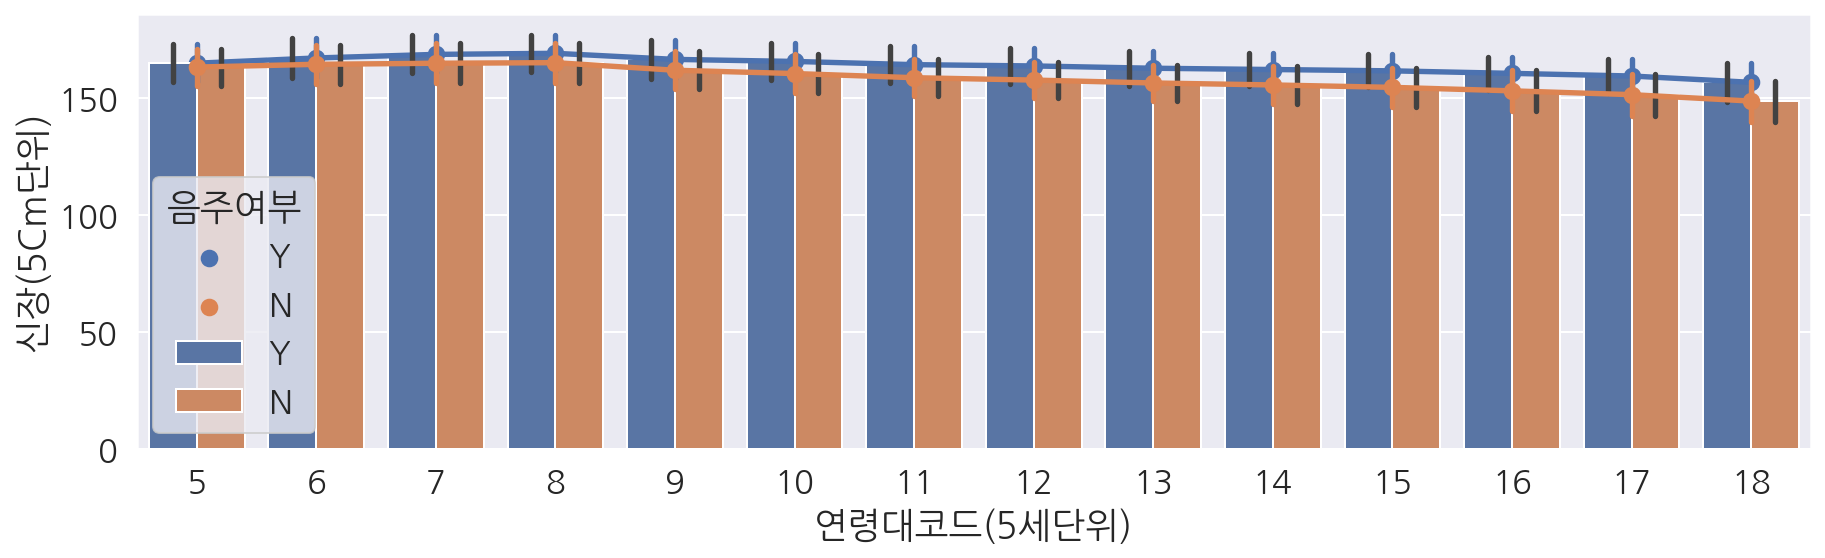

In [82]:
# 그래프를 같이 그릴 수도 있습니다.
plt.figure(figsize=(15,4))
#sns.lineplot(data=df, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="음주여부", ci="sd")
sns.barplot(data=df, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="음주여부", ci="sd")
sns.pointplot(data=df, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="음주여부", ci="sd")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='신장(5Cm단위)'>

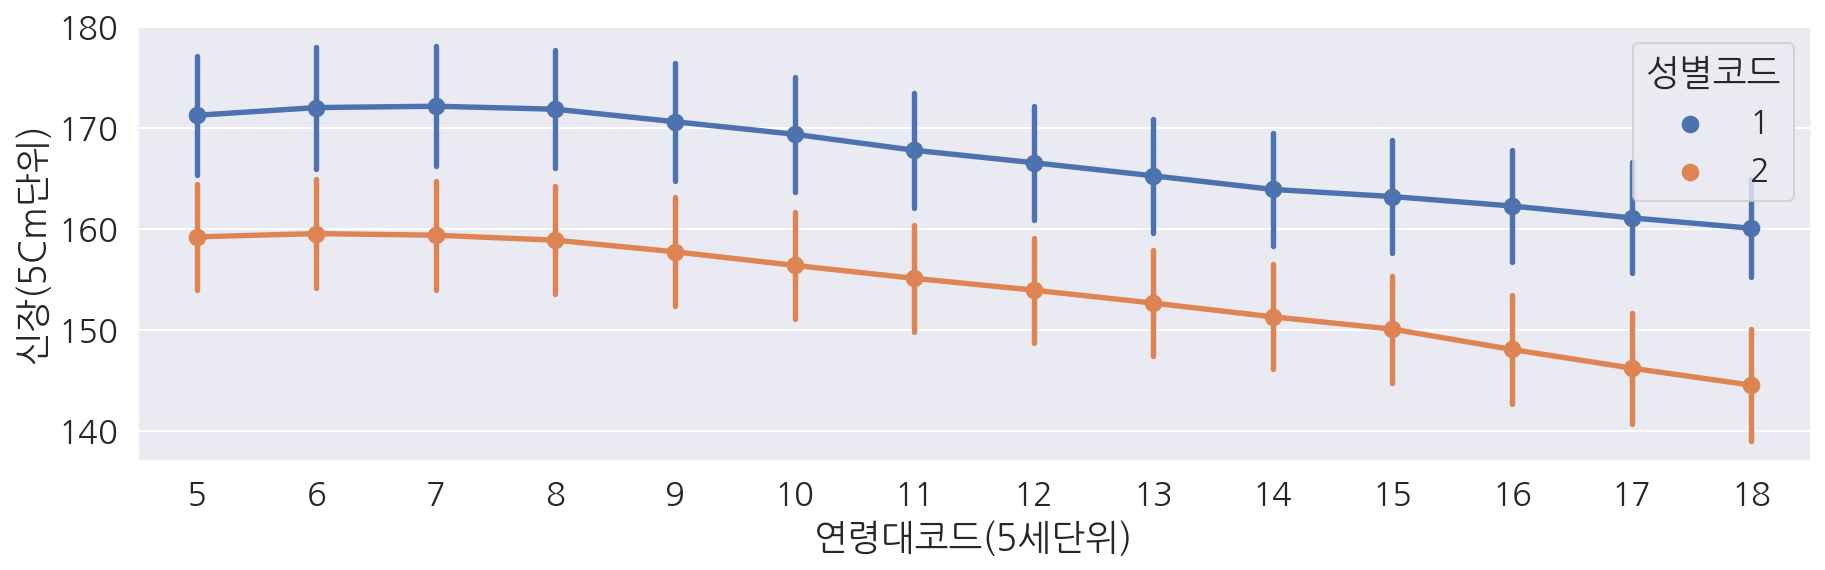

In [80]:
plt.figure(figsize=(15,4))
sns.pointplot(data=df, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="성별코드", ci="sd")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='혈색소'>

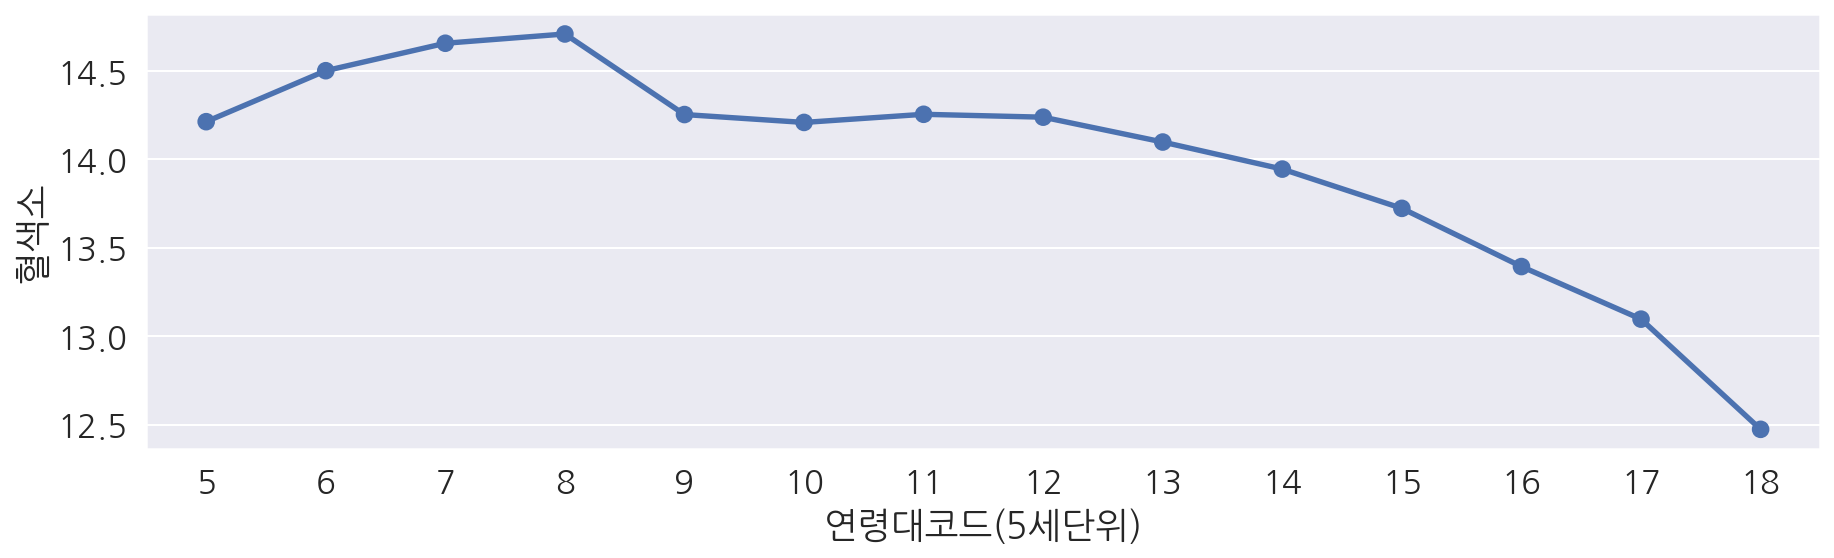

In [81]:
plt.figure(figsize=(15,4))
sns.pointplot(data=df, x="연령대코드(5세단위)", y="혈색소", ci=None)

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='신장(5Cm단위)'>

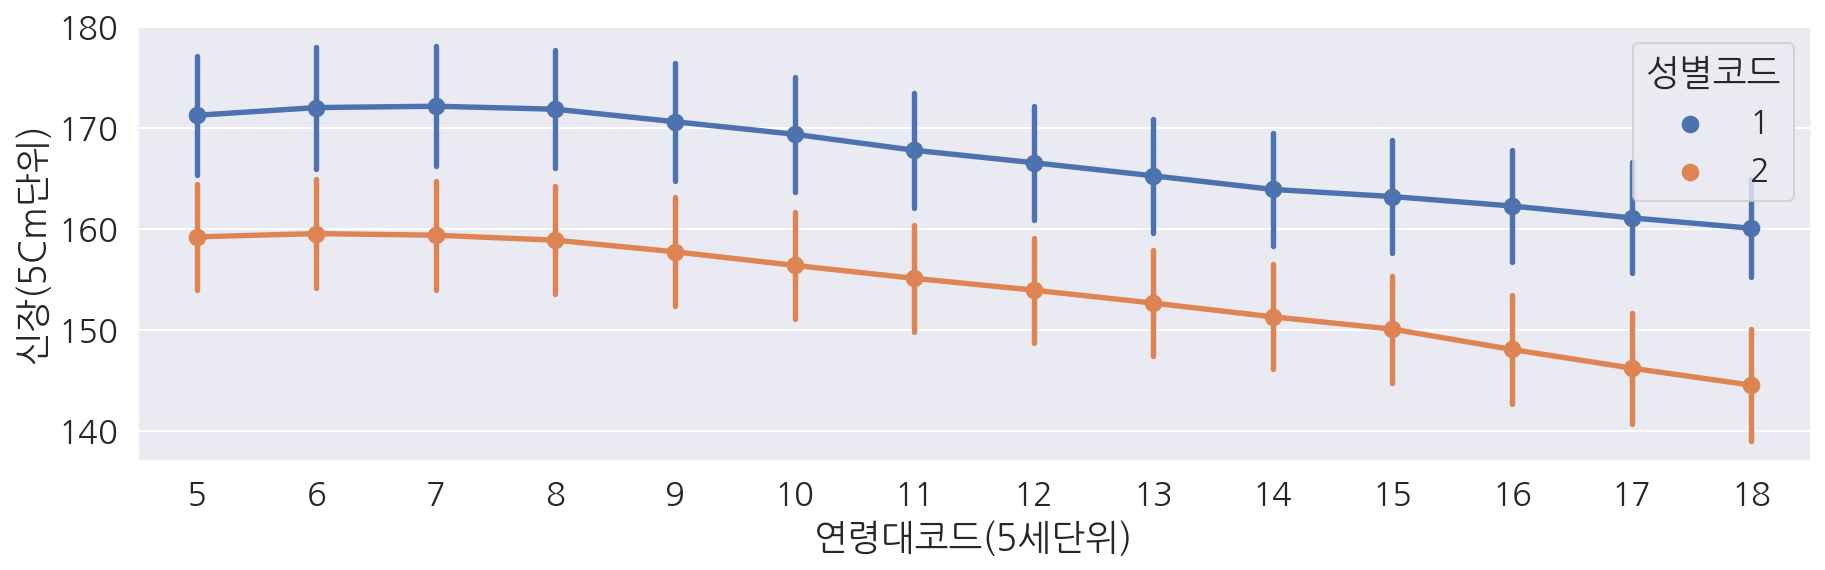

In [83]:
plt.figure(figsize=(15,4))
sns.pointplot(data=df, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="성별코드", ci="sd")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='혈색소'>

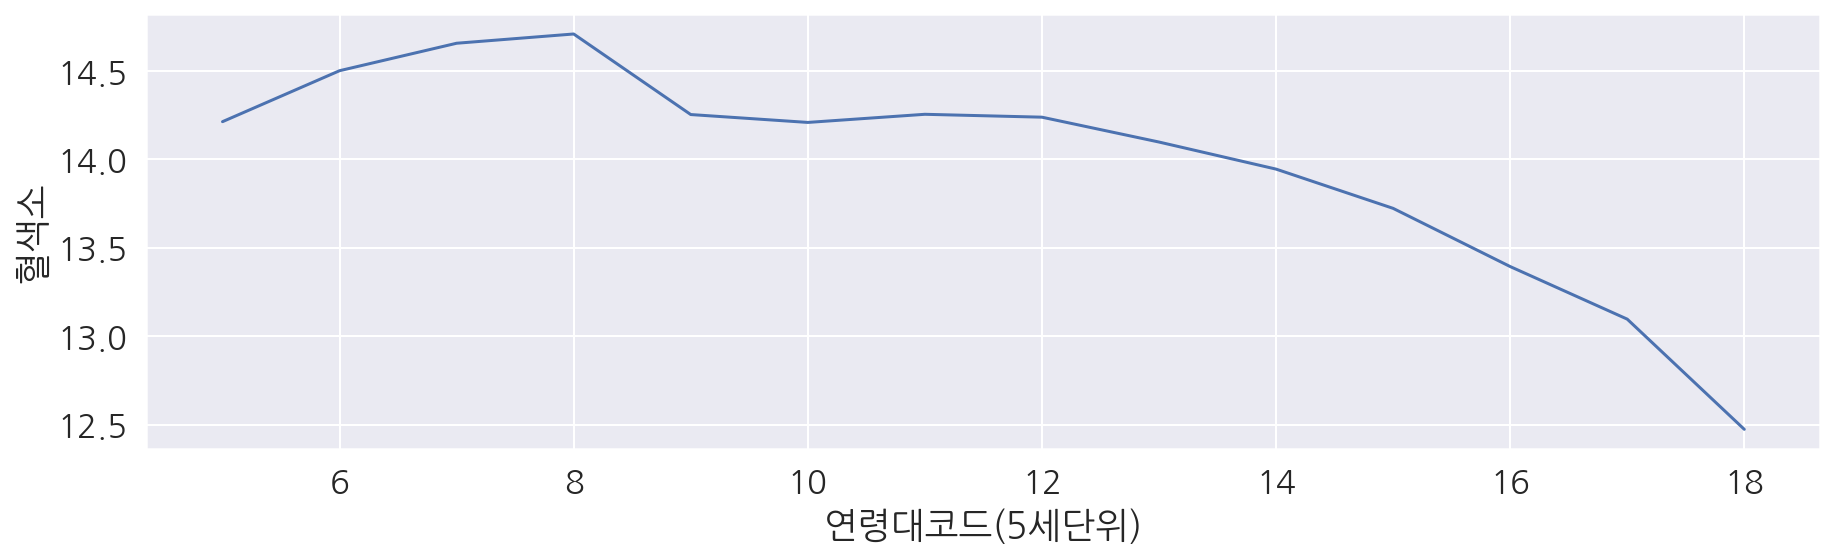

In [85]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df, x="연령대코드(5세단위)", y="혈색소", ci=None)

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='혈색소'>

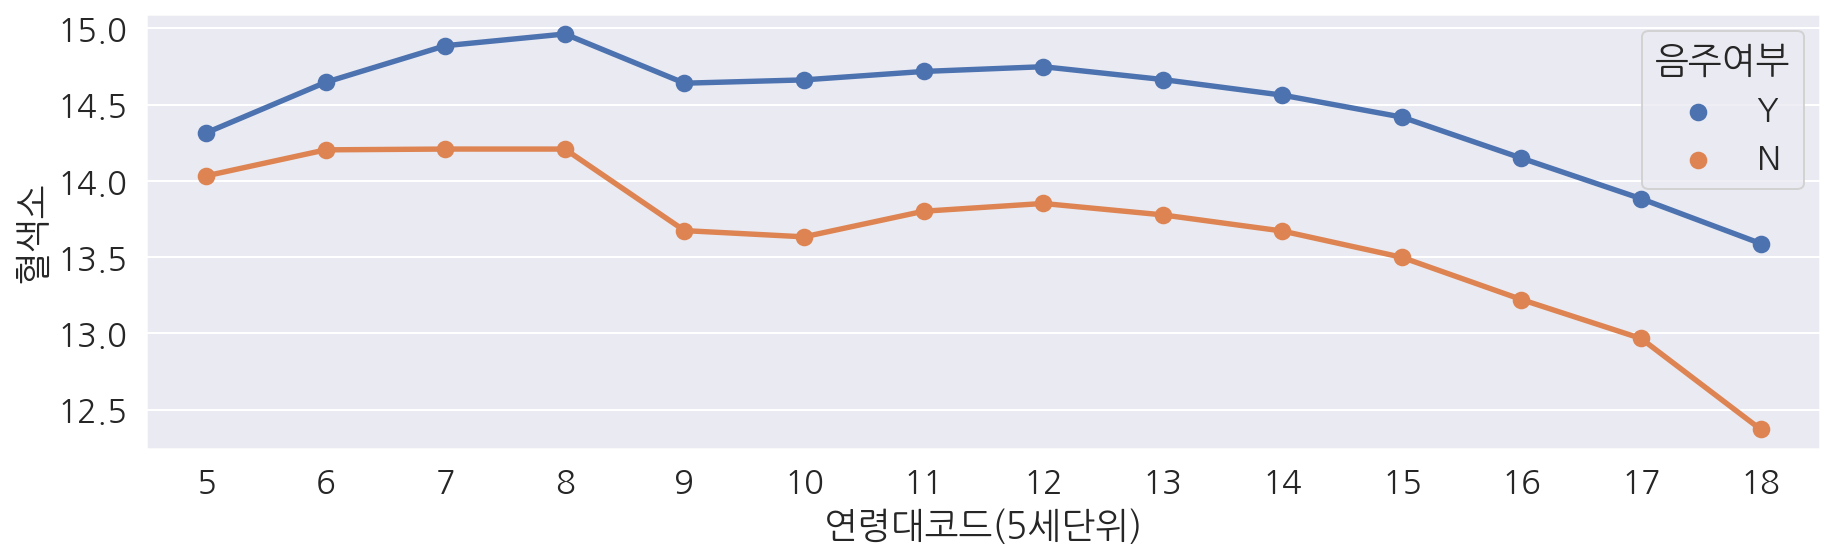

In [86]:
plt.figure(figsize=(15,4))
sns.pointplot(data=df, x="연령대코드(5세단위)", y="혈색소", hue="음주여부", ci=None)
# 연령대가 높아질수록 혈색소가 줄어들고 있습니다.
# 음주를 하면 혈색소가 평균적으로 더 높습니다.

# barplot은 막대로 개별값을 표현하는데  lineplot, pointplot을 통해서는 선으로 기울기까지 표현할 수 있습니다. 
# 가격 데이터, 매출/재고 데이터는 대체로 lineplot, pointplot으로 그리는 것이 좋습니다.

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg단위)'>

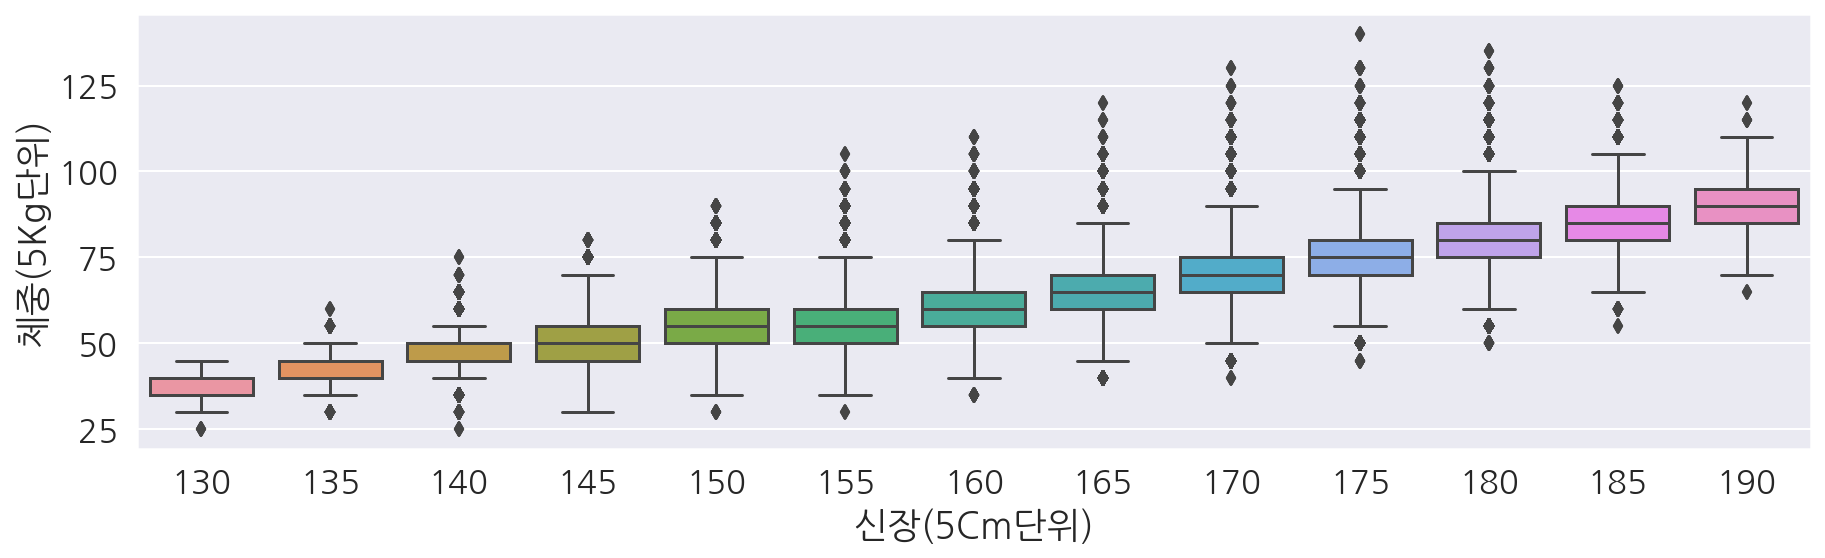

In [88]:
# boxplot은 박스와 수염이 있는 모양이어서 box and whisker plot으로도 불립니다. 특정 column 값들을 boxplot으로 그릴 수 있습니다.
# 박스의 밑은 1사분위수, 중간은 2사분위수, 위는 3사분위수입니다.
# 사용법은 다른 그래프들과 비슷합니다.
plt.figure(figsize=(15, 4))
sns.boxplot(data=df, x="신장(5Cm단위)", y="체중(5Kg단위)")

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg단위)'>

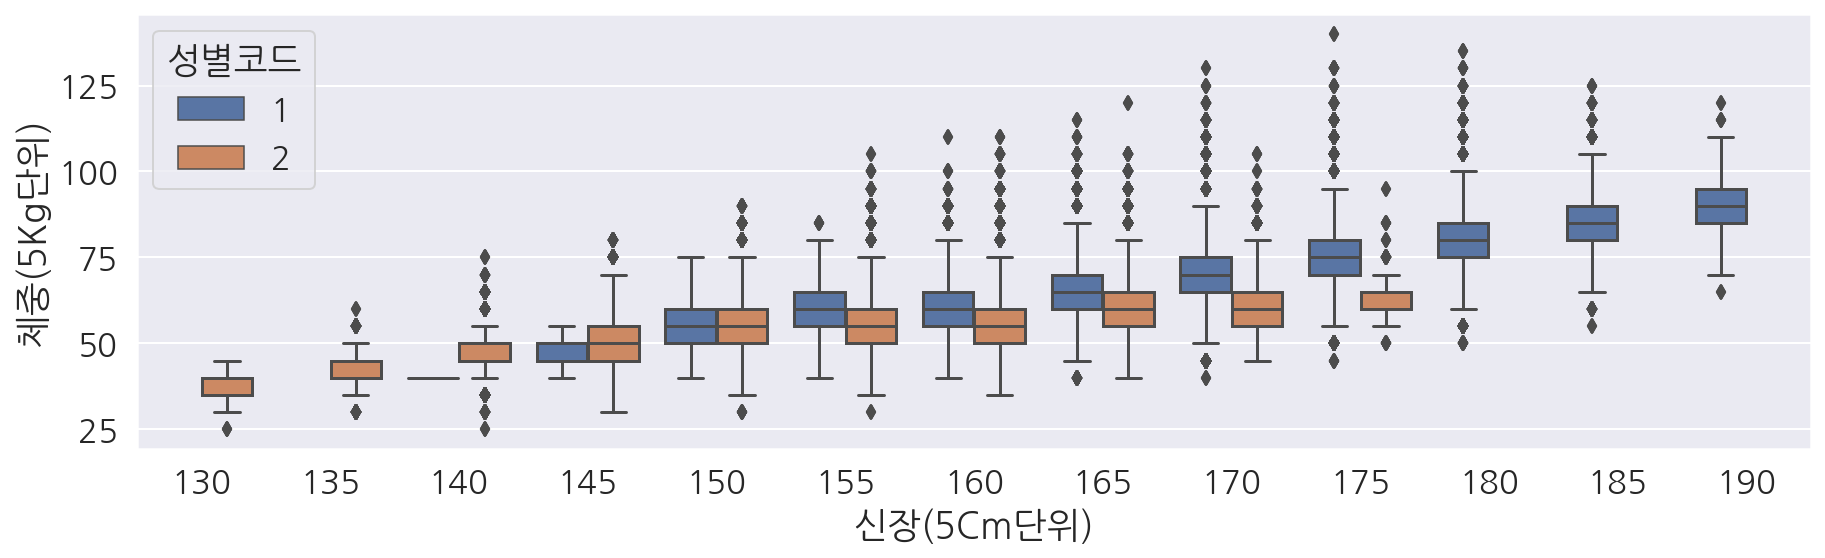

In [89]:
# 다른 plot들과 마찬가지로 hue에 성별코드를 넣어서 분리하여 볼 수 있습니다.
plt.figure(figsize=(15, 4))
sns.boxplot(data=df, x="신장(5Cm단위)", y="체중(5Kg단위)", hue="성별코드")

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg단위)'>

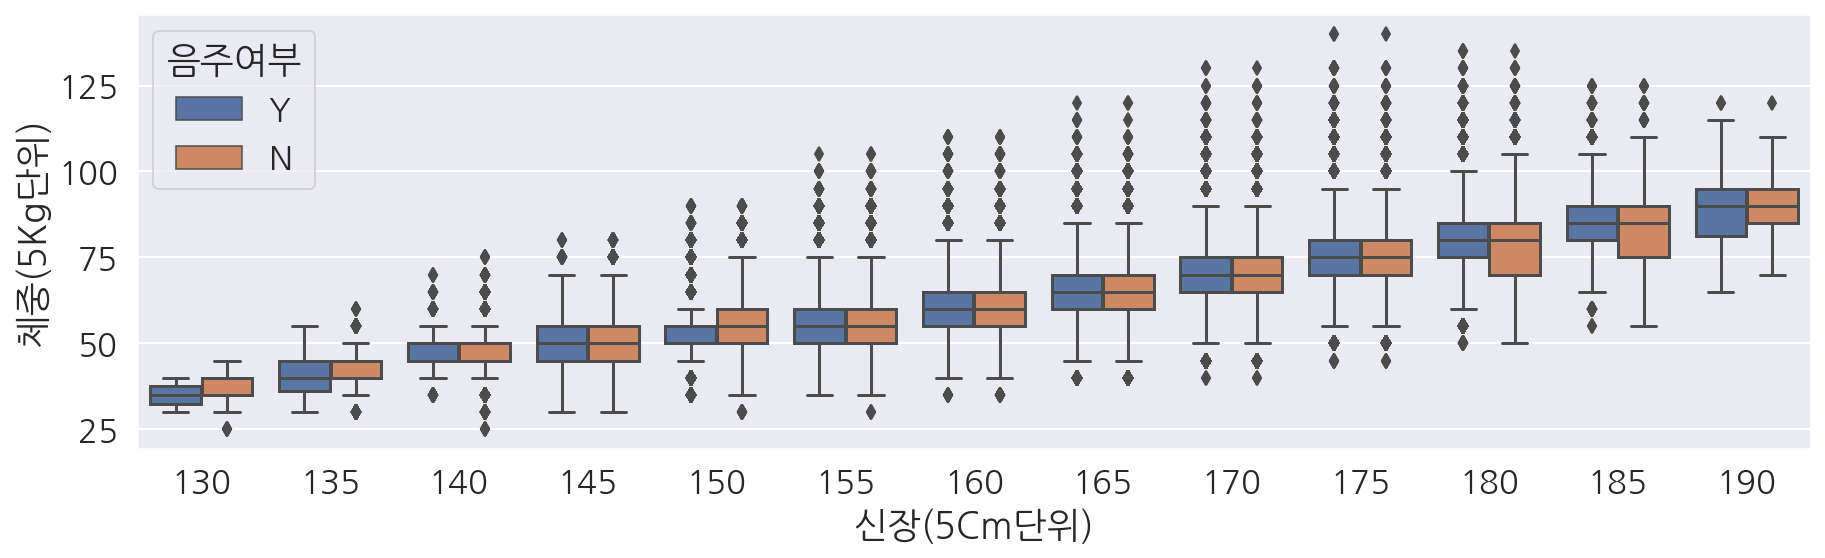

In [90]:
plt.figure(figsize=(15, 4))
sns.boxplot(data=df, x="신장(5Cm단위)", y="체중(5Kg단위)", hue="음주여부")
# 음주여부로 바꾸어서 plot을 그려봅니다.
# 사분위수 범위(IQR)은 3사분위수 - 1사분위수입니다. 
# 3사분위수보다 1.5 x IQR 이상을 초과하는 값과 Q1보다 1.5 x IQR 이상 미달하는 값은 이상치입니다. 
# 점, 원, 별표 모양으로 표현합니다.

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg단위)'>

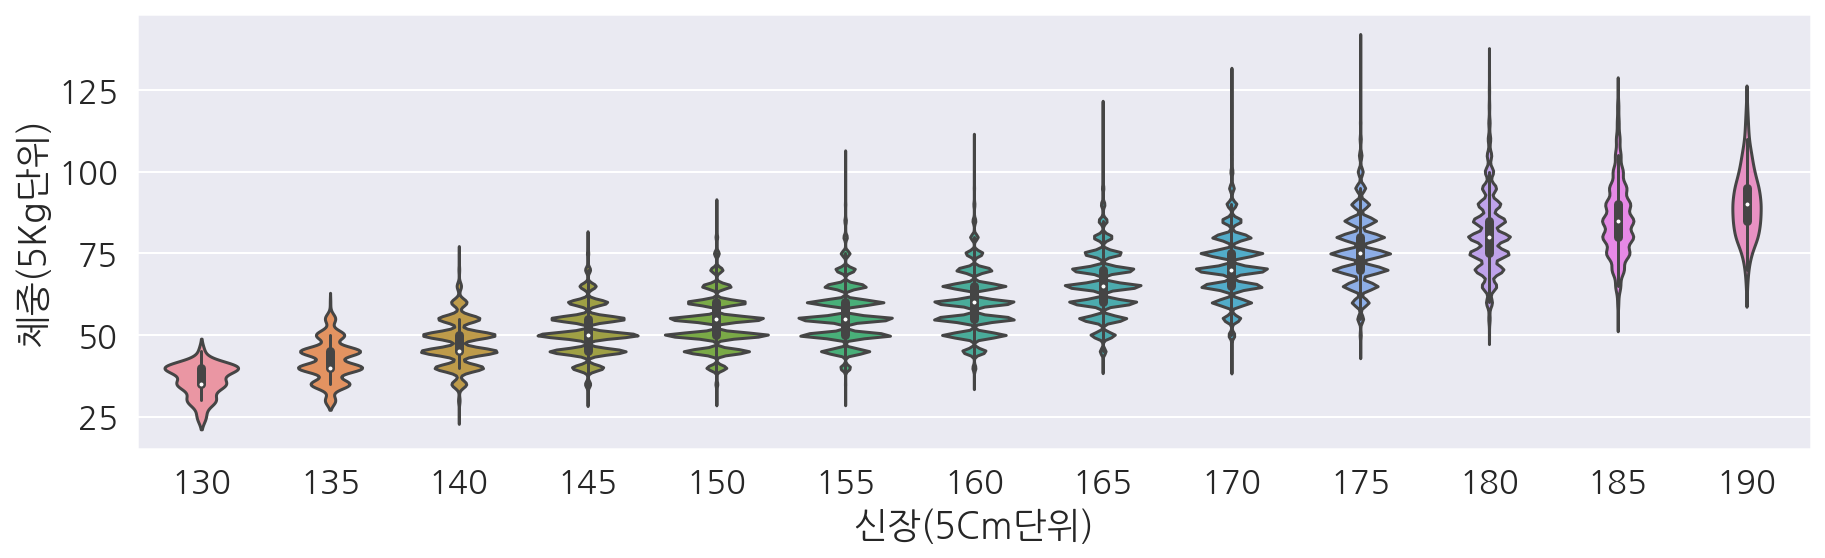

In [91]:
# violinplot는 boxplot의 단점을 보완하여 더 자세하게 보여주는 그래프입니다.
plt.figure(figsize=(15, 4))
sns.violinplot(data=df, x="신장(5Cm단위)", y="체중(5Kg단위)")

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg단위)'>

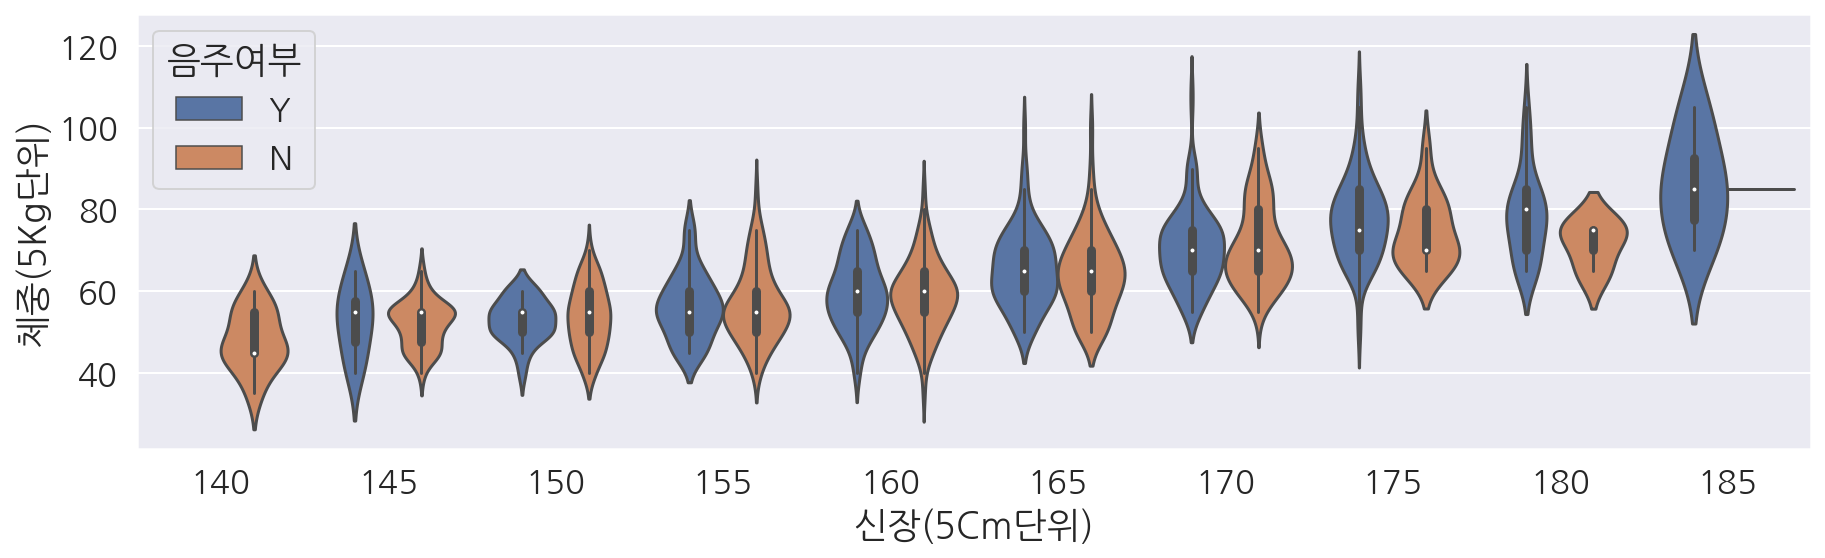

In [92]:
plt.figure(figsize=(15, 4))
sns.violinplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg단위)", hue="음주여부")
# sample 데이터로 바꾸고, hue로 음주여부를 추가해봅니다.

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg단위)'>

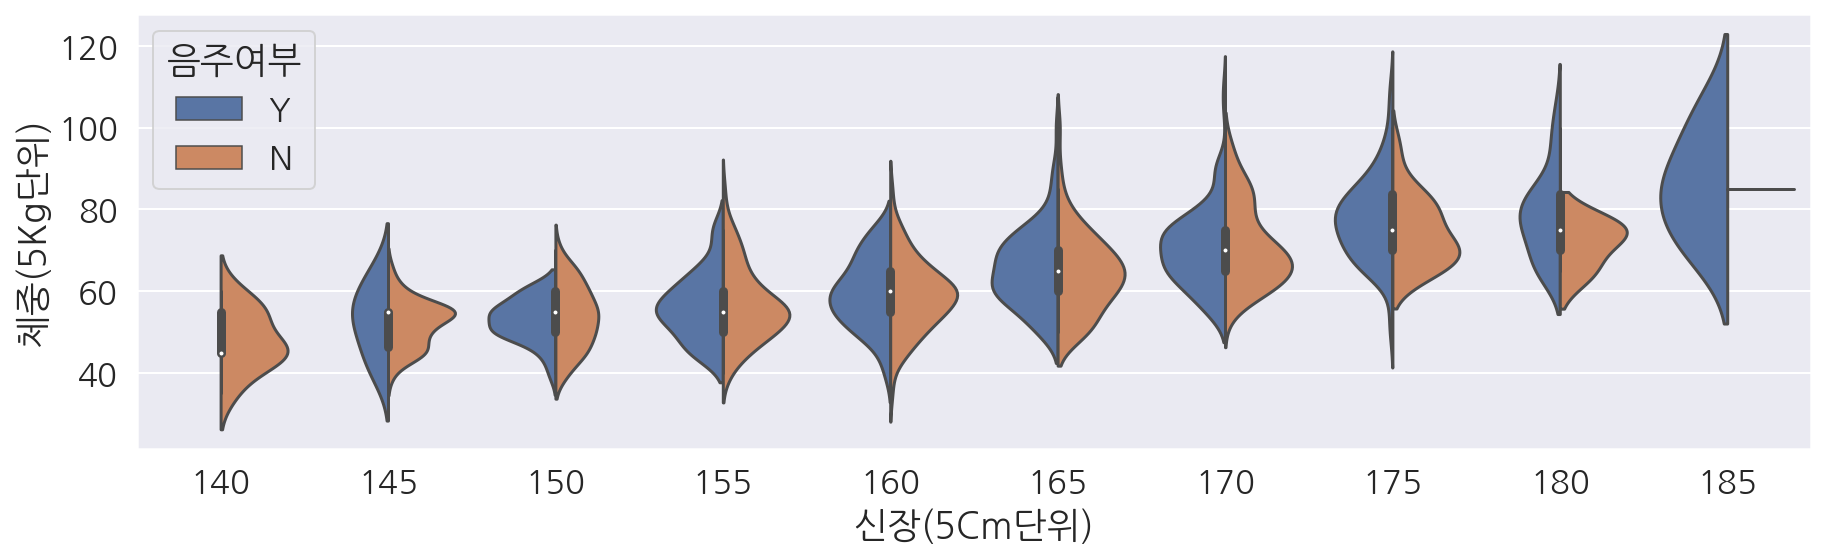

In [93]:
plt.figure(figsize=(15, 4))
sns.violinplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg단위)", hue="음주여부", split=True)
# split 옵션을 이용하면 두 개의 데이터를 붙여서 볼 수 있습니다.

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='혈색소'>

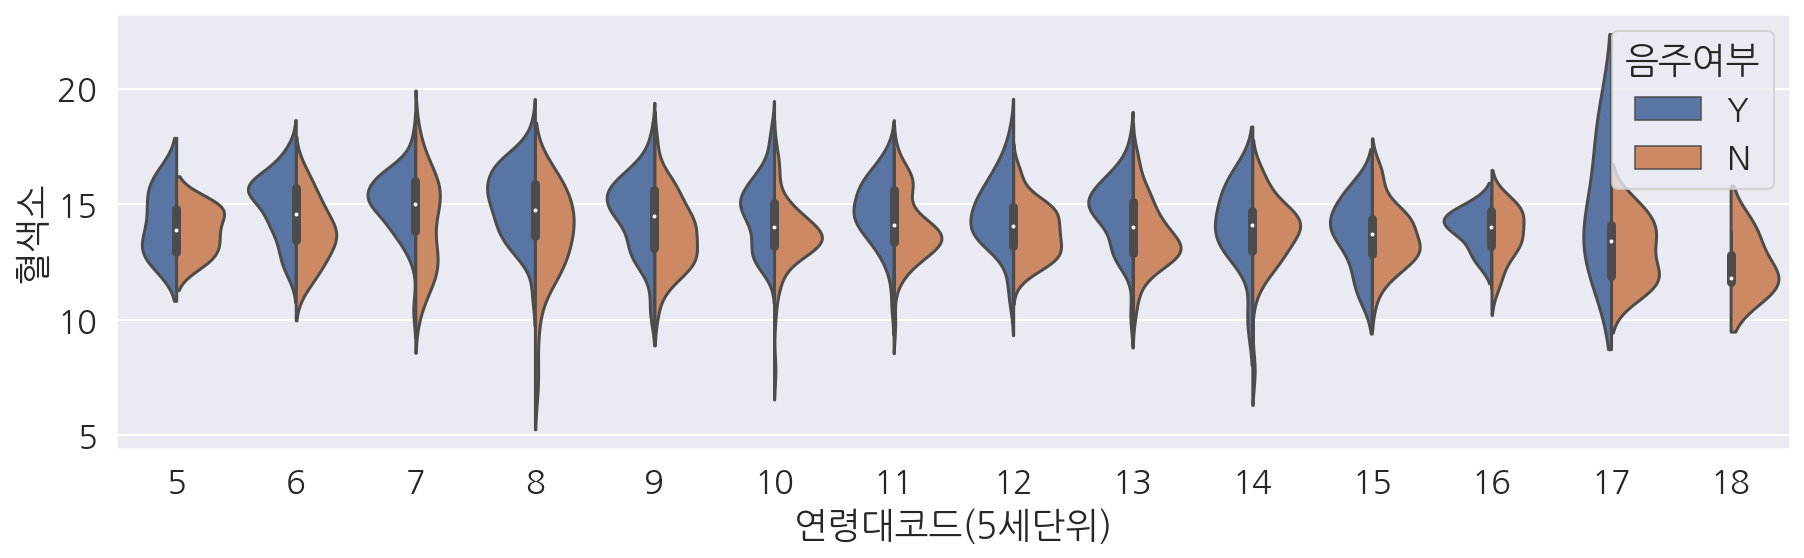

In [94]:
plt.figure(figsize=(15, 4))
sns.violinplot(data=df_sample, x="연령대코드(5세단위)", y="혈색소", hue="음주여부", split=True)
# x축의 16에서 보면 음주하는 사람들의 값이 확연히 높고, 전체적으로 더 위에 분포하는 것을 볼 수 있습니다.

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 9.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 36.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 43.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 48.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 47.2% of the points cannot be placed; yo

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg단위)'>

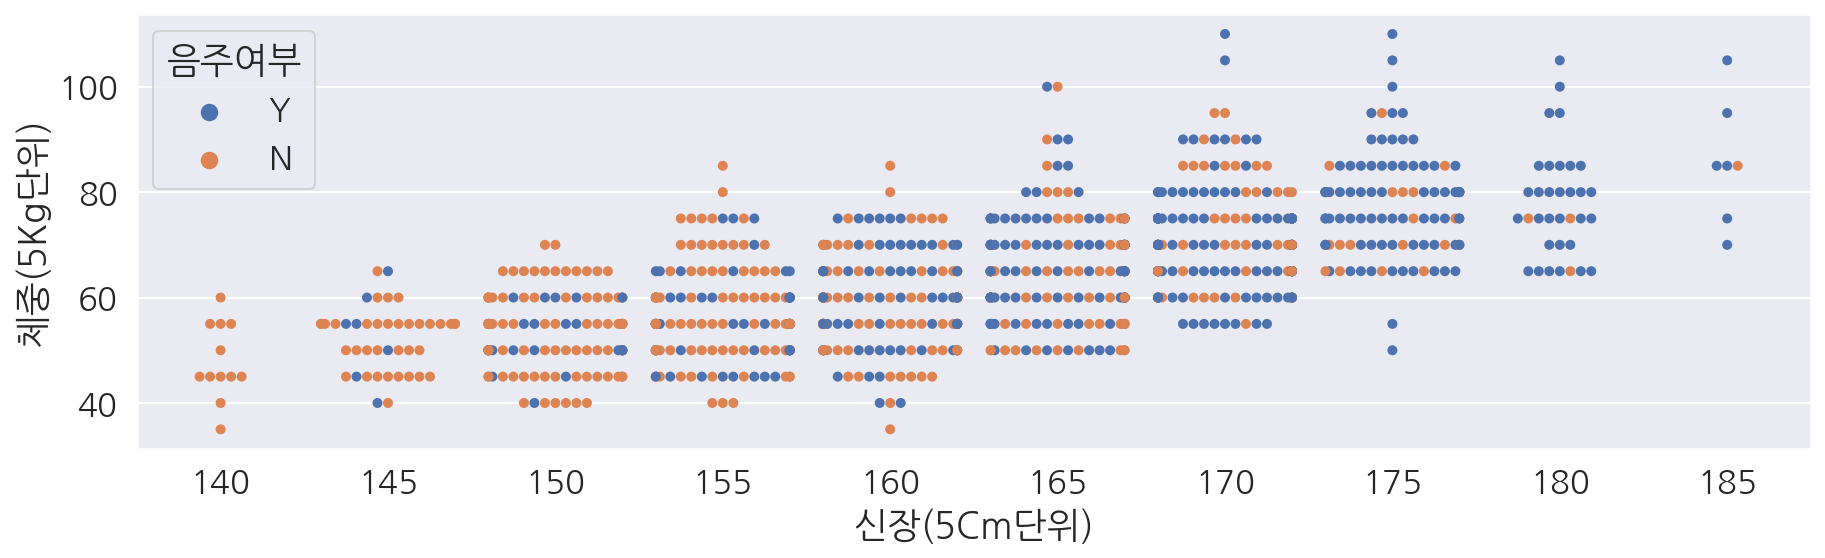

In [95]:
plt.figure(figsize=(15, 4))
sns.swarmplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg단위)", hue="음주여부")
# swarm plot은 산점도를 통해 데이터를 찍어볼 수 있습니다.

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 9.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 36.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 43.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 48.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 47.2% of the points cannot be placed; yo

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg단위)'>

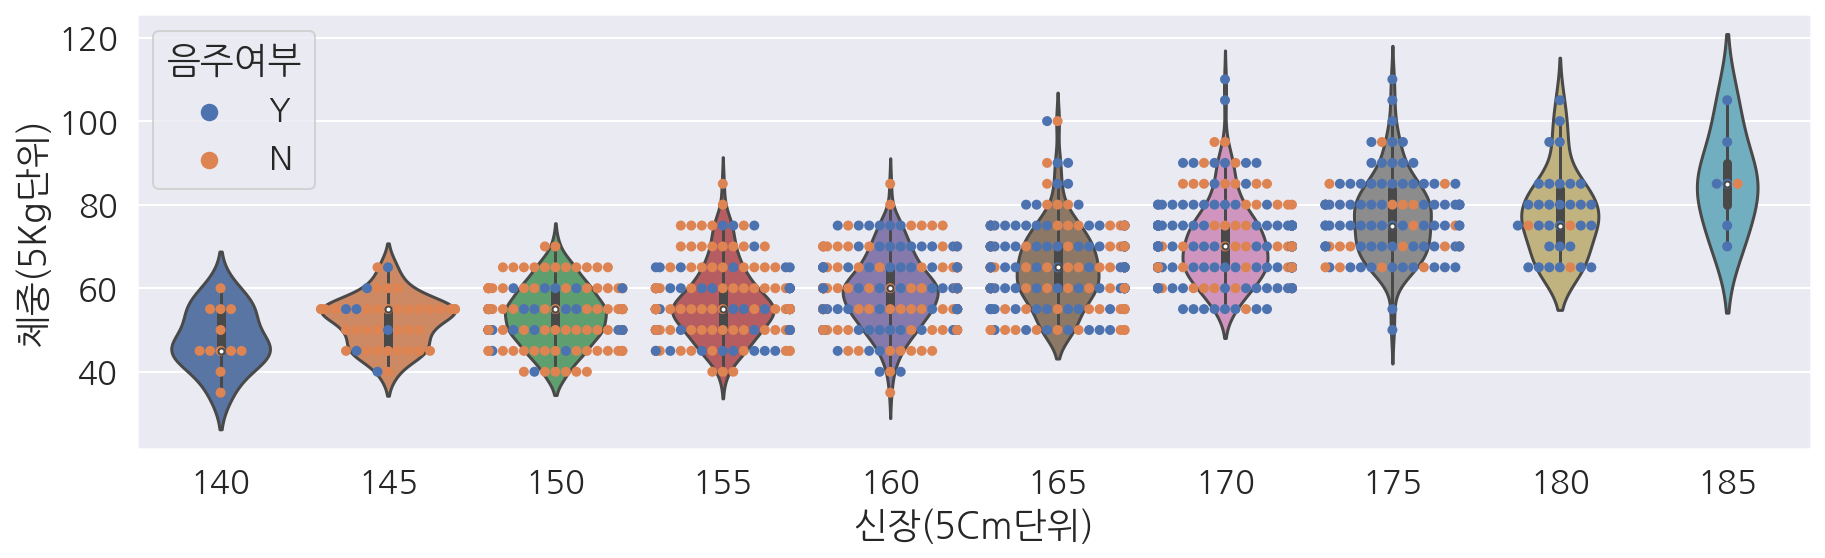

In [96]:
plt.figure(figsize=(15, 4))
sns.swarmplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg단위)", hue="음주여부")
sns.violinplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg단위)")
# 여러 그래프를 같이 그릴 수 있습니다.

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 10.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 13.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 7.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 7.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 5.7% of the points cannot be placed; you 

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='혈색소'>

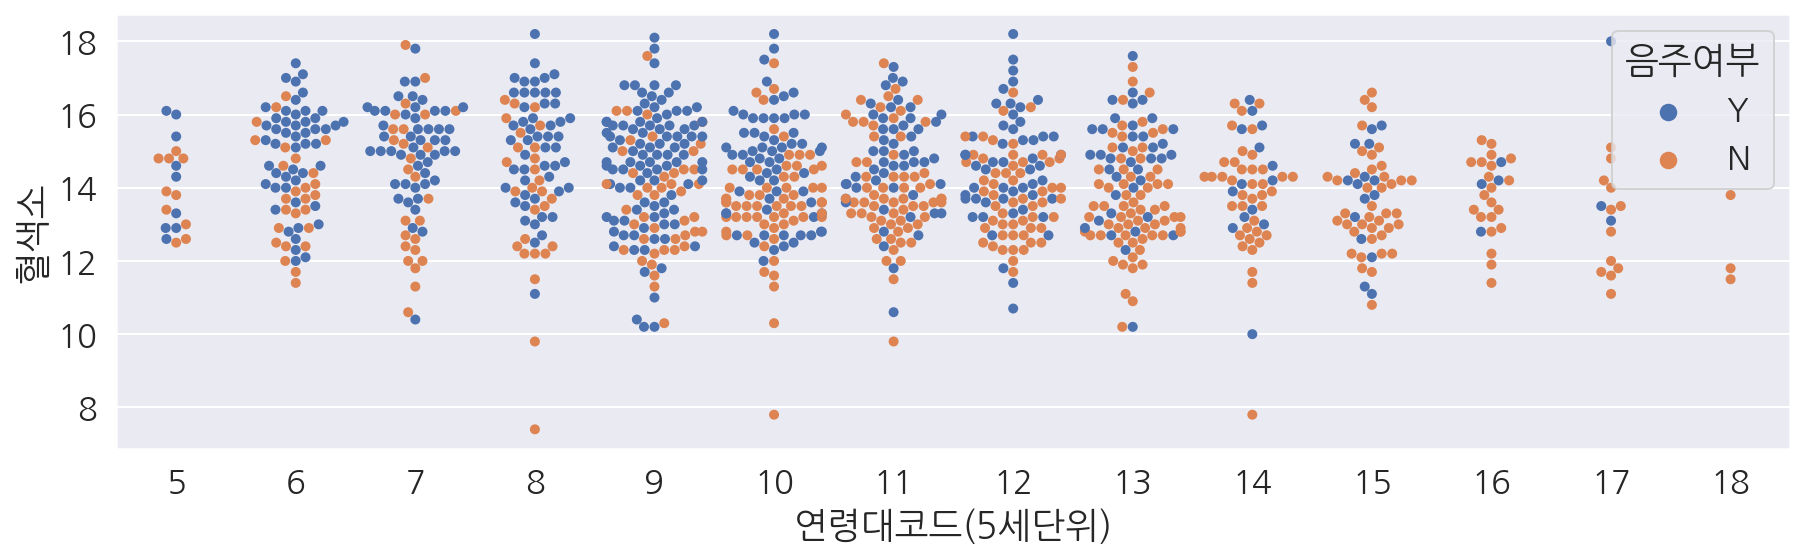

In [97]:
plt.figure(figsize=(15, 4))
sns.swarmplot(data=df_sample, x="연령대코드(5세단위)", y="혈색소", hue="음주여부")
# 연령대에 따른 혈색소를 알아봅니다. 음주여부를 다른 색상으로 나타낼 수 있습니다.

<Figure size 1080x288 with 0 Axes>

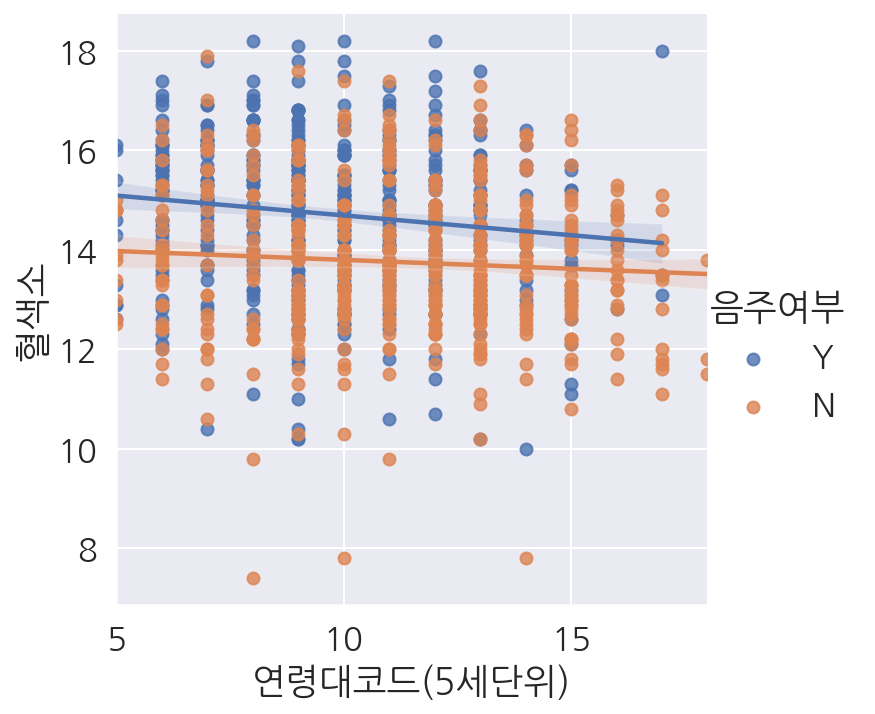

In [101]:
plt.figure(figsize=(15, 4))
sns.lmplot(data=df_sample, x="연령대코드(5세단위)", y="혈색소", hue="음주여부")
# lmplot 는 scatterplot과는 다르게 회귀선을 확인해볼 수 있습니다.

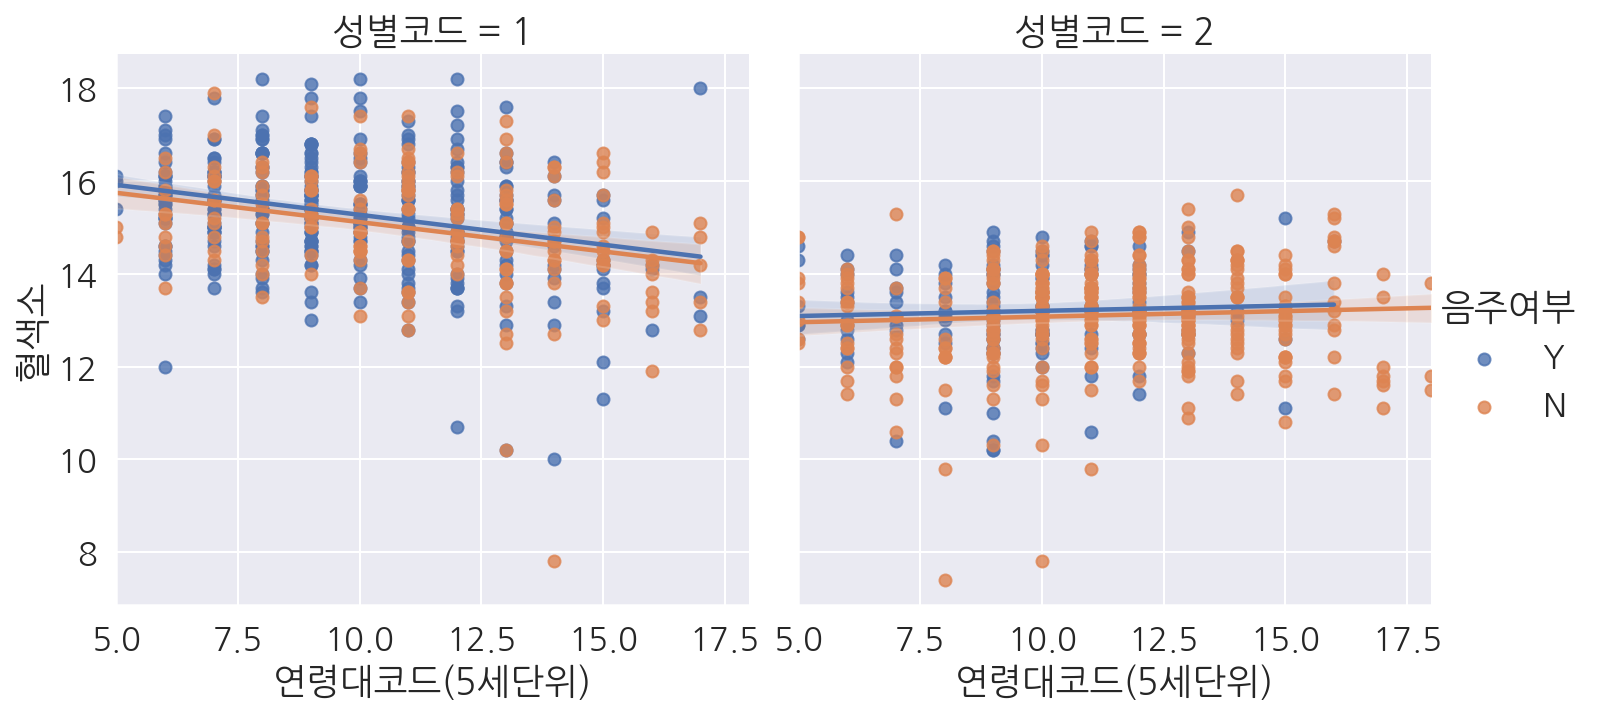

In [102]:
sns.lmplot(data=df_sample, x="연령대코드(5세단위)", y="혈색소", hue="음주여부", col="성별코드")
# col이란 옵션으로 색상으로 다르게 하여 데이터를 분류하여 볼 수 있습니다.

# lmplot은 값들이 겹쳐서 보이는데 분포를 보고 싶다면 swarmplot을 사용하는 게 좋습니다. 회귀선을 그리거나 다변수 시각화를 할 때 좋습니다.
# x축에도 수치형 데이터를 넣어도 되지만 막대가 너무 많으면 보기에 불편합니다. barplot을 기울기로 보고 싶다면 lineplot이 좋습니다.
# boxplot을 그리면 이상치를 확인하기 좋습니다. violinplot은 분포를 더 자세히 볼 수 있습니다.

<AxesSubplot:xlabel='(혈청지오티)AST', ylabel='(혈청지오티)ALT'>

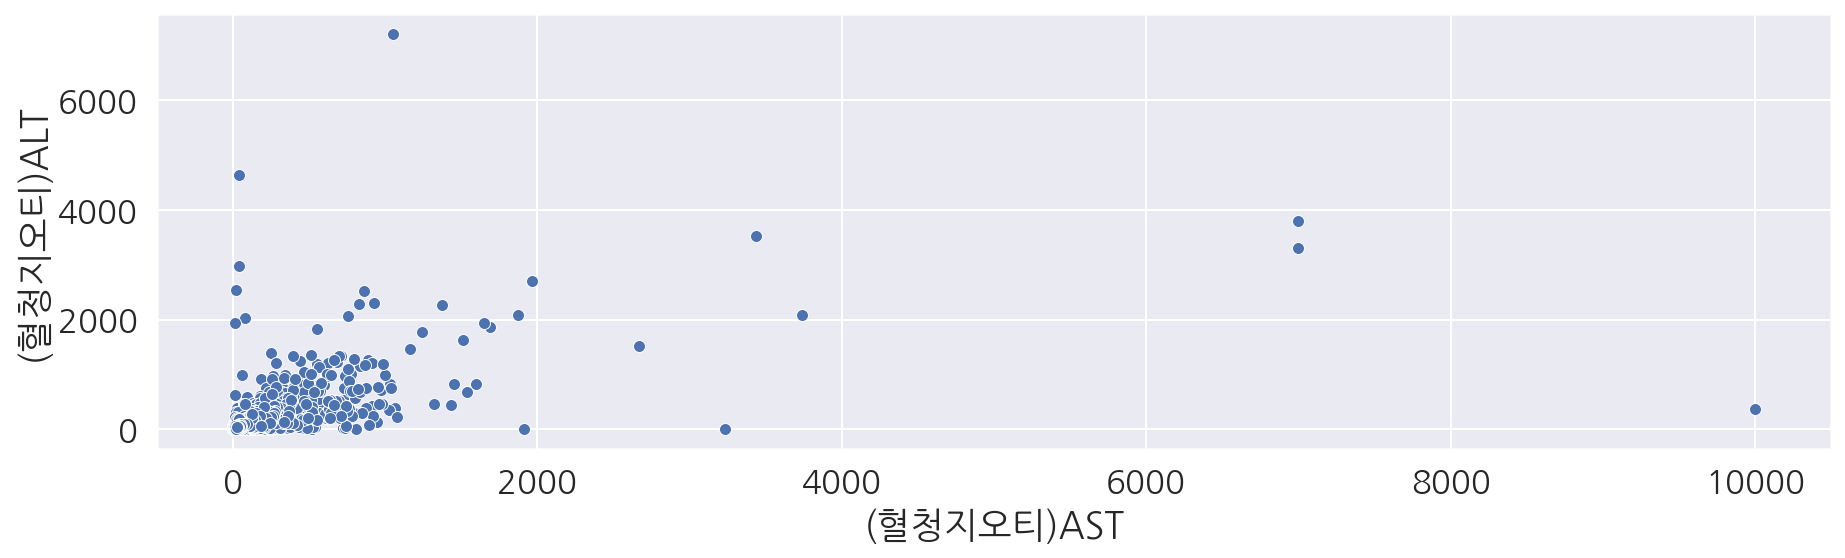

In [103]:
# scatterplot은 수치형 데이터를 볼 때 사용하기 좋습니다.
# tab키를 활용해서 자동완성을 활용할 수 있습니다.
# option들을 보면 scatterplot도 다른 그래프와 사용 방법이 비슷합니다.

plt.figure(figsize=(15, 4))
sns.scatterplot(data=df, x="(혈청지오티)AST", y="(혈청지오티)ALT")

<AxesSubplot:xlabel='(혈청지오티)AST', ylabel='(혈청지오티)ALT'>

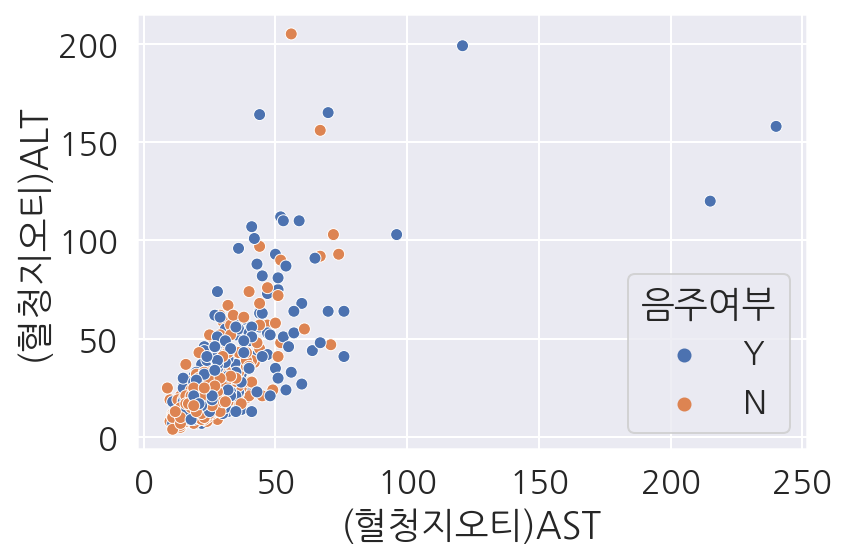

In [104]:
# scatterplot을 활용하면 그래프의 이상치를 파악하기 쉽습니다.
# 하나하나 찍느라 시간이 오래 걸리기 때문에 샘플을 사용하는 것을 추천드립니다.
sns.scatterplot(data=df_sample, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부")
# 여기서도 음주여부에 따라 차이가 있는지 확인하기 위해 hue 값에 "음주여부"를 넣습니다.

<AxesSubplot:xlabel='(혈청지오티)AST', ylabel='(혈청지오티)ALT'>

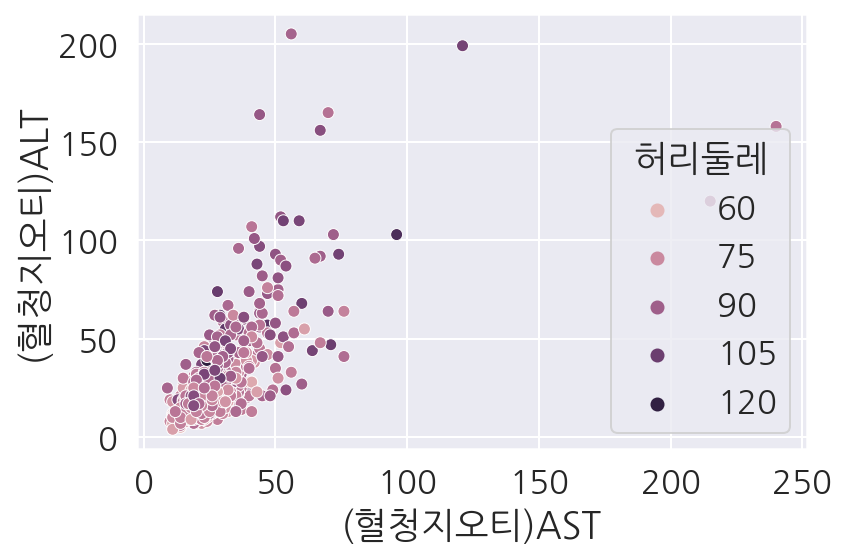

In [105]:
sns.scatterplot(data=df_sample, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="허리둘레")
# 다른 연속형 데이터도 넣을 수 있습니다.

<AxesSubplot:xlabel='(혈청지오티)AST', ylabel='(혈청지오티)ALT'>

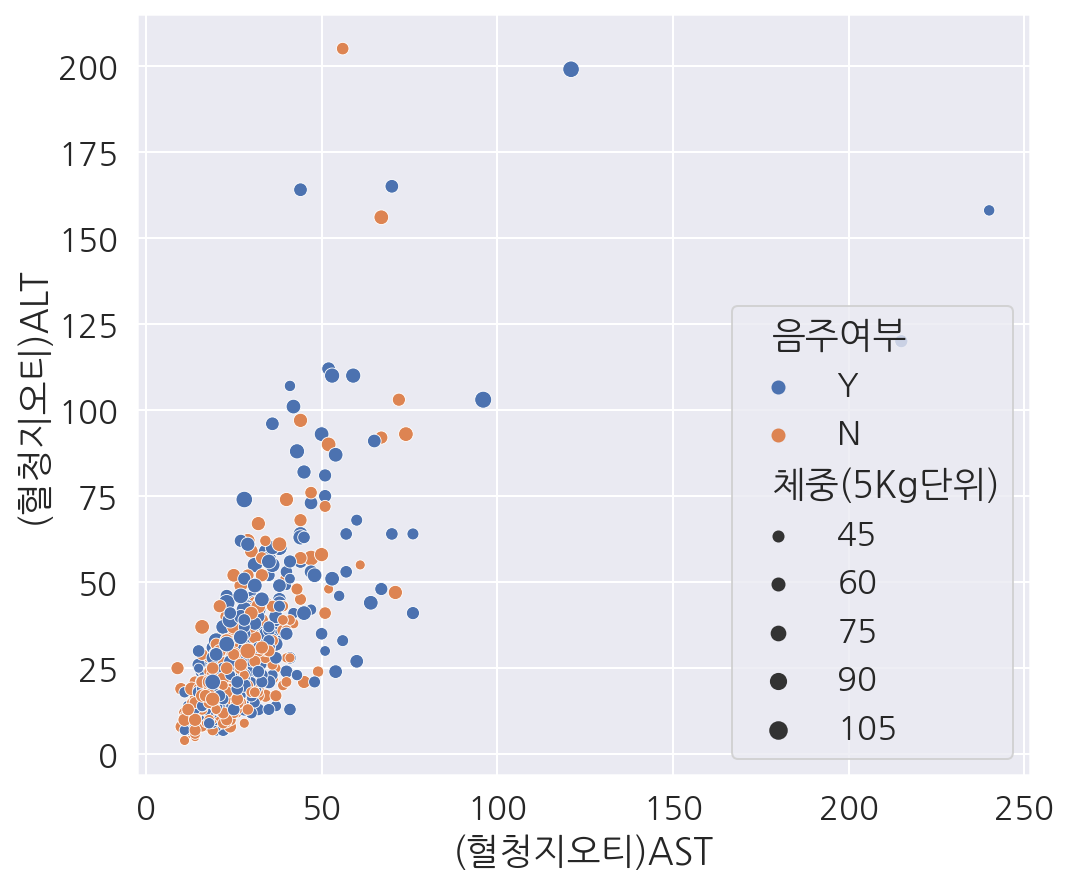

In [107]:

# size라는 옵션으로 체중에 따라 크기를 다르게 지정할 수 있습니다.
plt.figure(figsize=(8, 7))
sns.scatterplot(data=df_sample, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부", size="체중(5Kg단위)")

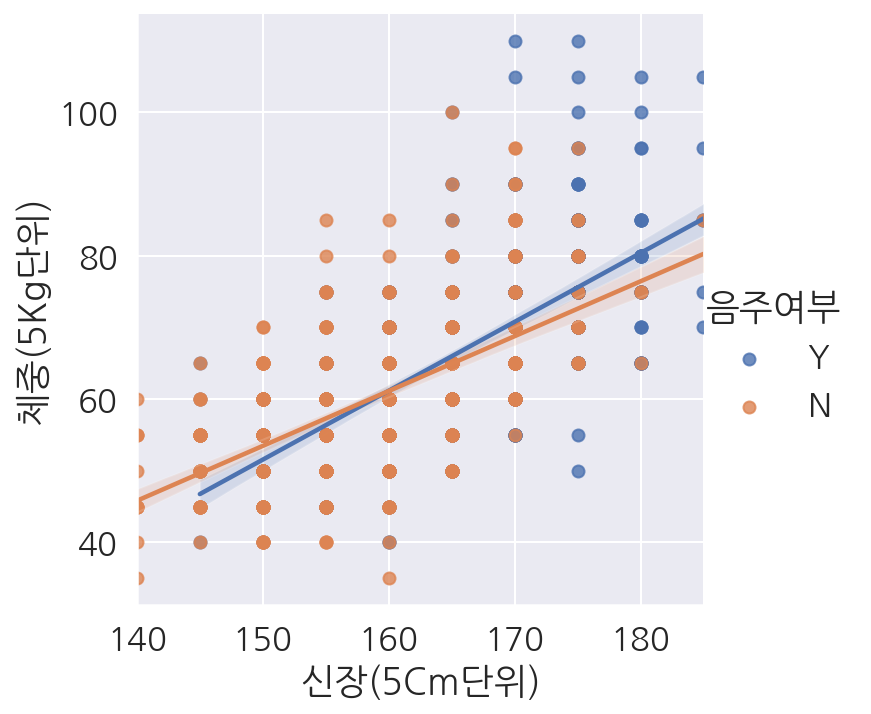

In [109]:
# lmplot으로 상관 관계를 더 잘 파악할 수 있습니다.
# 그리드처럼 격자로 나옵니다. categorical 데이터로 인식하기 때문입니다.
sns.lmplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg단위)", hue="음주여부")

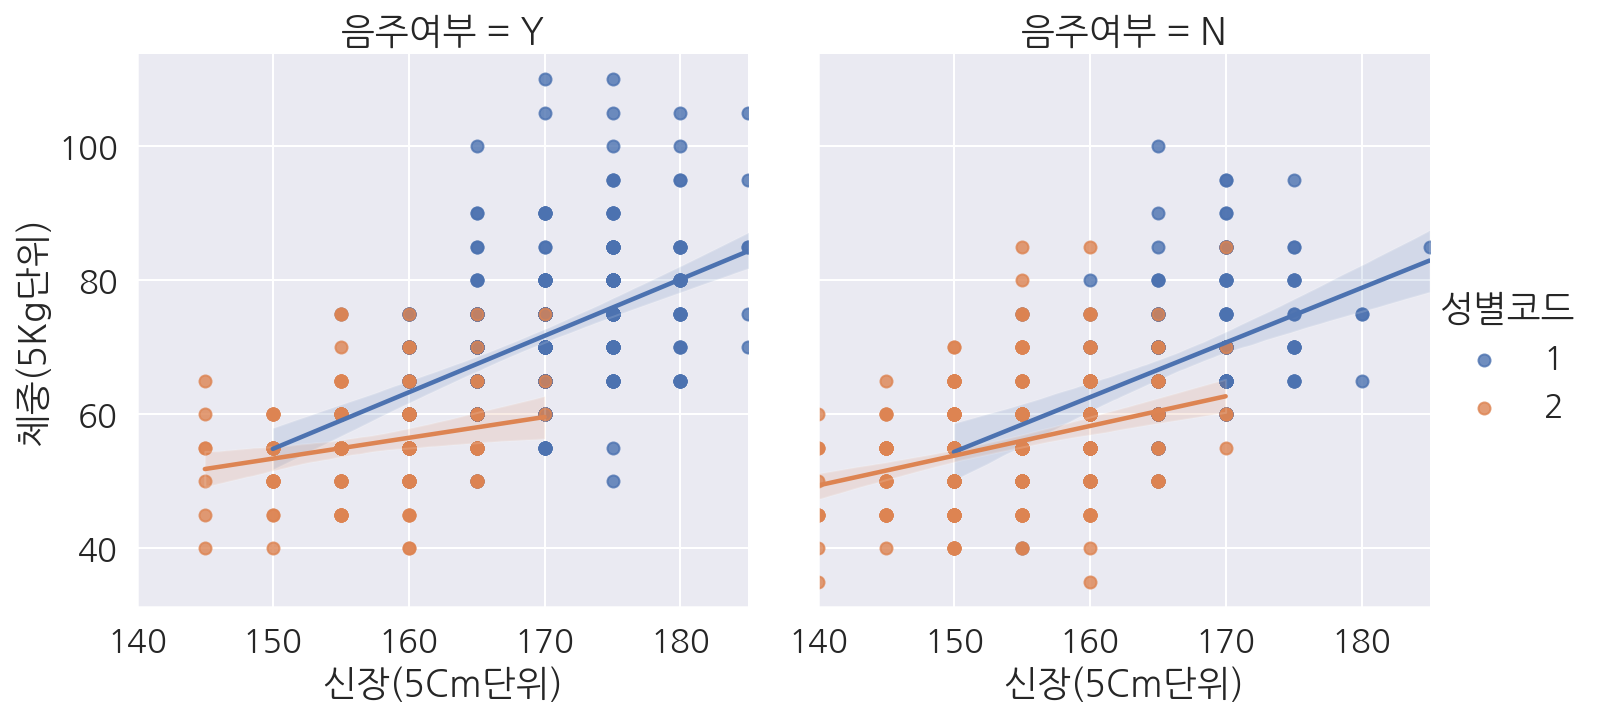

In [111]:
sns.lmplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg단위)", hue="성별코드", col="음주여부")
# 왼쪽 아래에서 오른쪽 위로 선이 그려지면 양의 상관관계가 있다고 표현합니다.
# col에 음주여부도 추가해서 넣어줍니다.

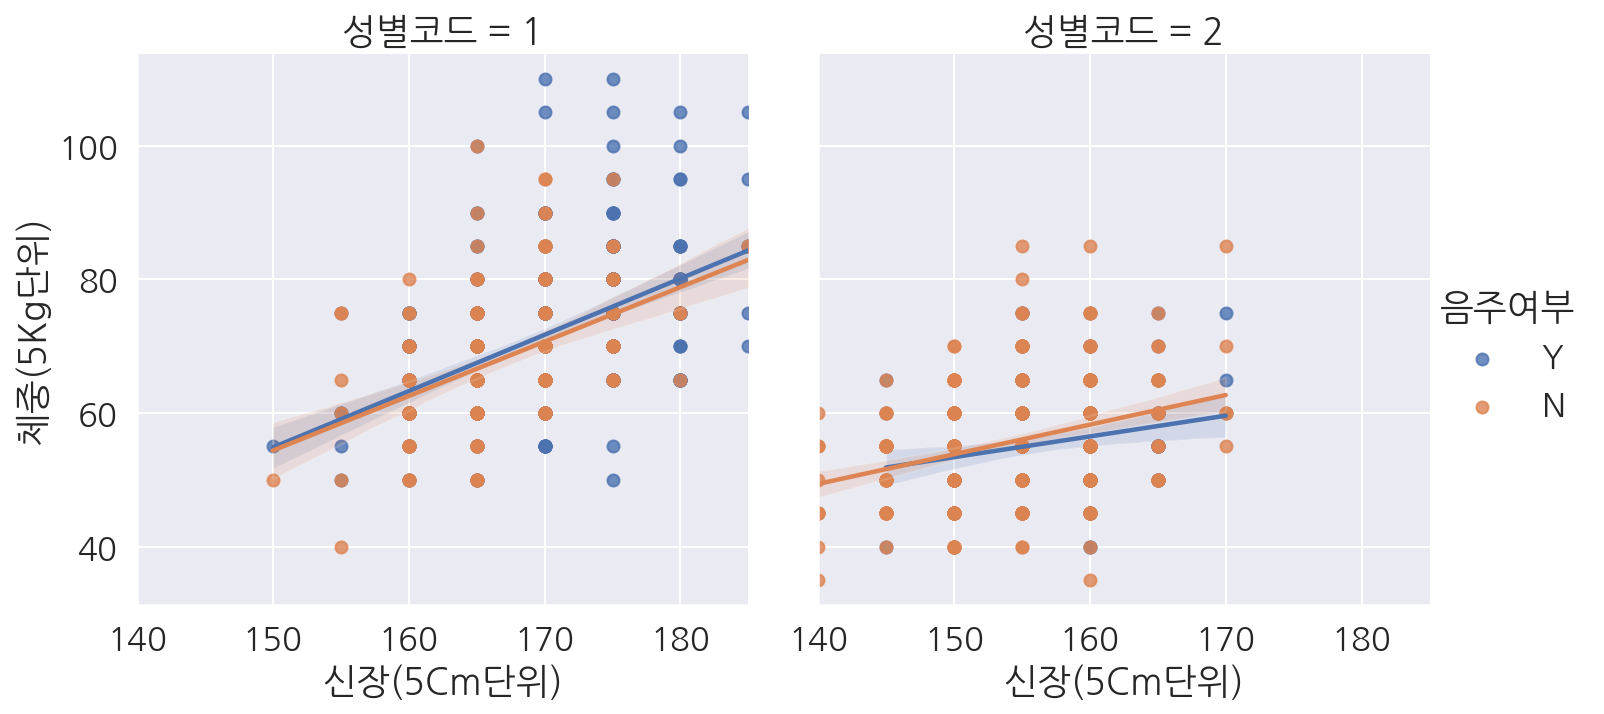

In [112]:
sns.lmplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg단위)", hue="음주여부", col="성별코드")
# 여성의 경우에는 음주 여부에 따라 신장과 체중의 상관관계가 높은 것으로 보여집니다.
# 여러 카테고리 값에 따라 subplot을 그릴 수 있다는 것이 장점입니다.

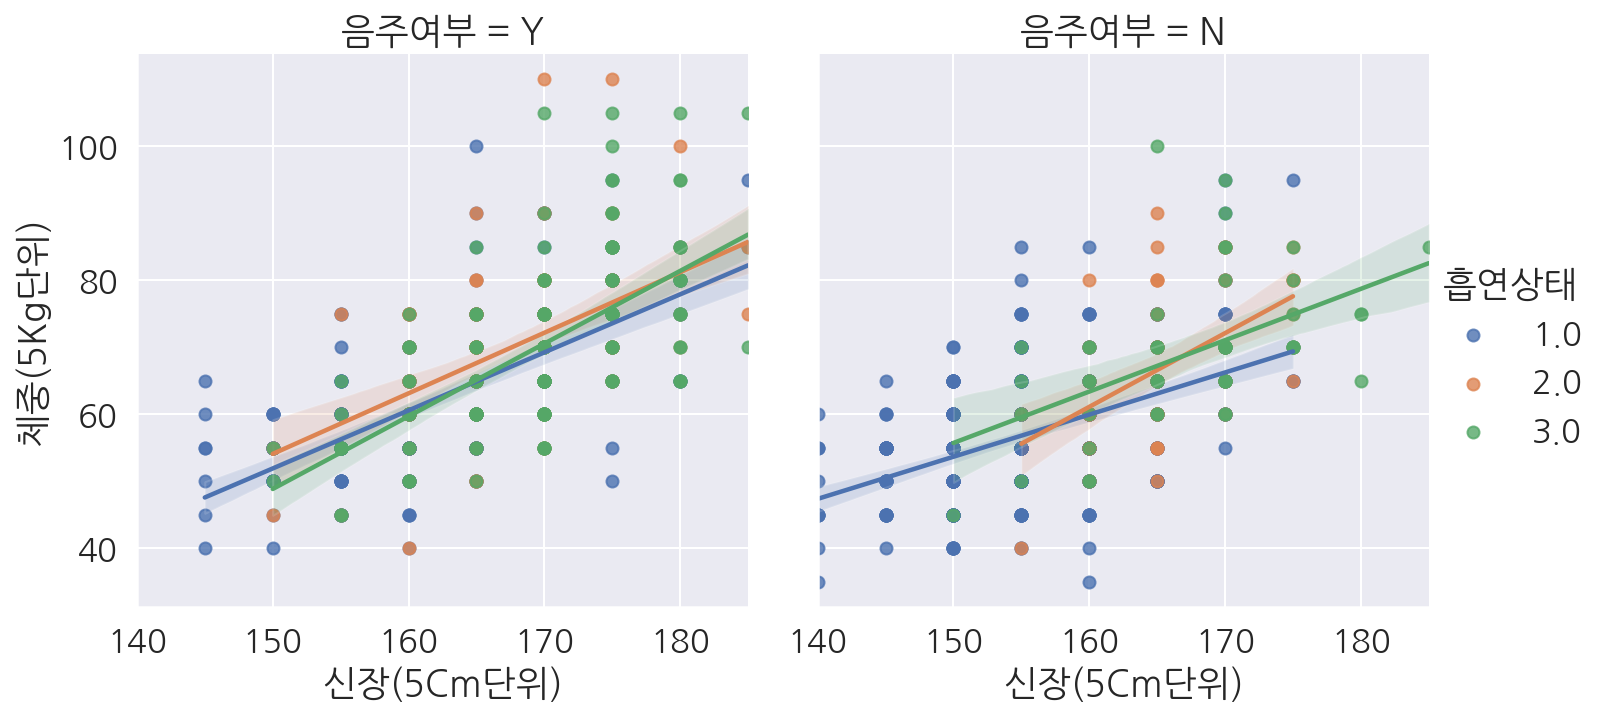

In [116]:
sns.lmplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg단위)", hue="흡연상태", col="음주여부")
# 흡연상태와 음주여부도 함께 살펴봅니다.

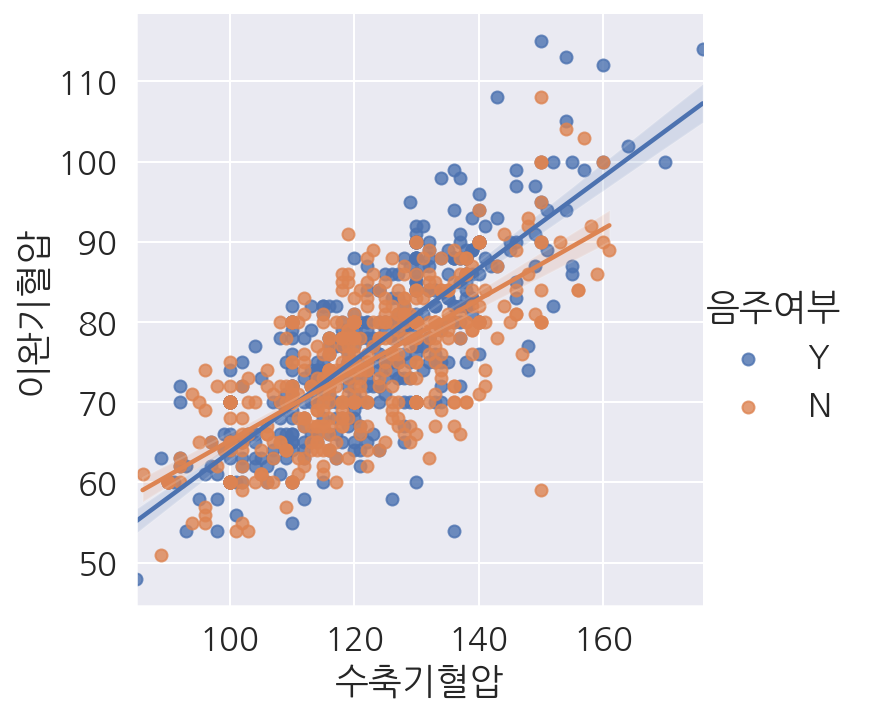

In [117]:
sns.lmplot(data=df_sample, x="수축기혈압", y="이완기혈압", hue="음주여부")
# 음주여부에 따라 건강검진 수치가 차이가 있습니다.

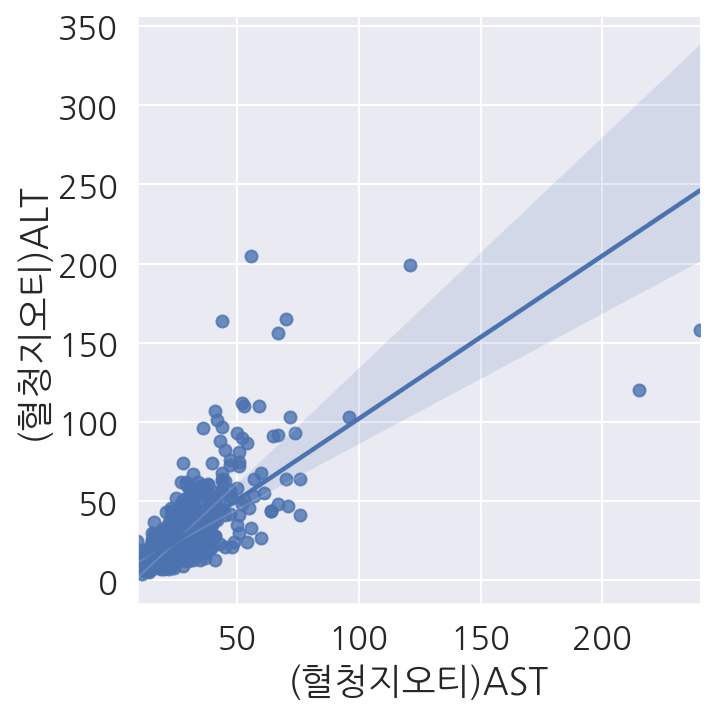

In [118]:
sns.lmplot(data=df_sample, x="(혈청지오티)AST", y="(혈청지오티)ALT")
# 두 특성은 강한 상관관계를 보입니다.

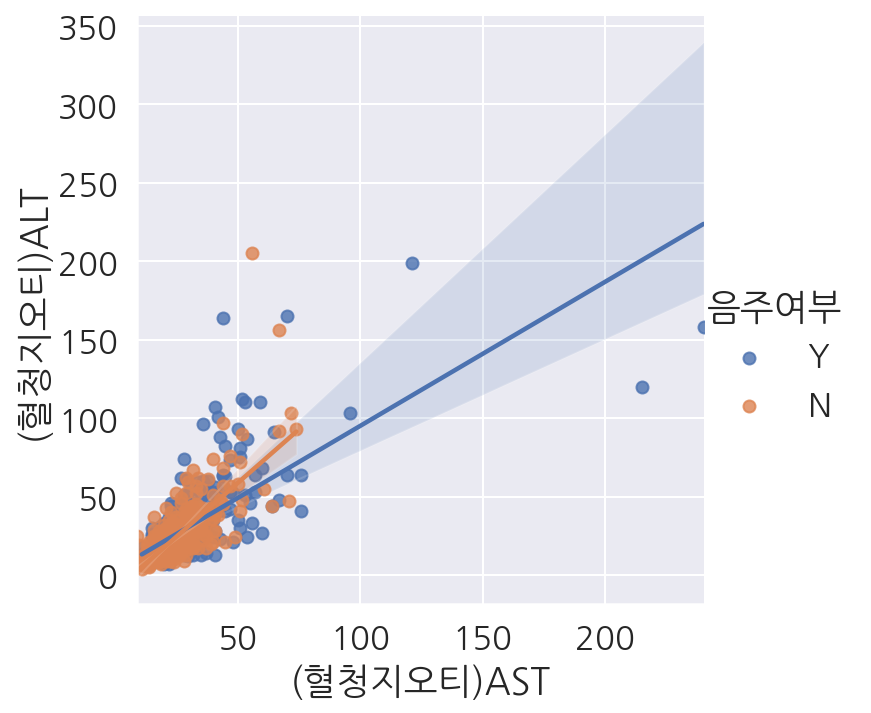

In [124]:
sns.lmplot(data=df_sample, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부")
# 음주여부에 따라서도 차이가 있지만 이상치가 있습니다.

In [125]:
df_sample[["(혈청지오티)AST", "음주여부"]]

(혈청지오티)AST 음주여부
276826        31.0    Y
849425        17.0    Y
504499        38.0    Y
601054        34.0    N
980221        23.0    N
...            ...  ...
890013        19.0    N
875389        38.0    Y
358458        59.0    Y
808228        23.0    N
317698        27.0    Y

[1000 rows x 2 columns]

In [133]:
df_sample["음주여부NUM"] = [True if x == "Y" else False  for x in df_sample["음주여부"]]
df_sample["음주여부NUM"]
!pip install  --trusted-host pypi.org --trusted-host files.pythonhosted.org -U  statsmodels

     |████████████████████████████████| 9.5 MB 24 kB/s eta 0:00:011
     |████████████████████████████████| 231 kB 24 kB/s eta 0:00:01


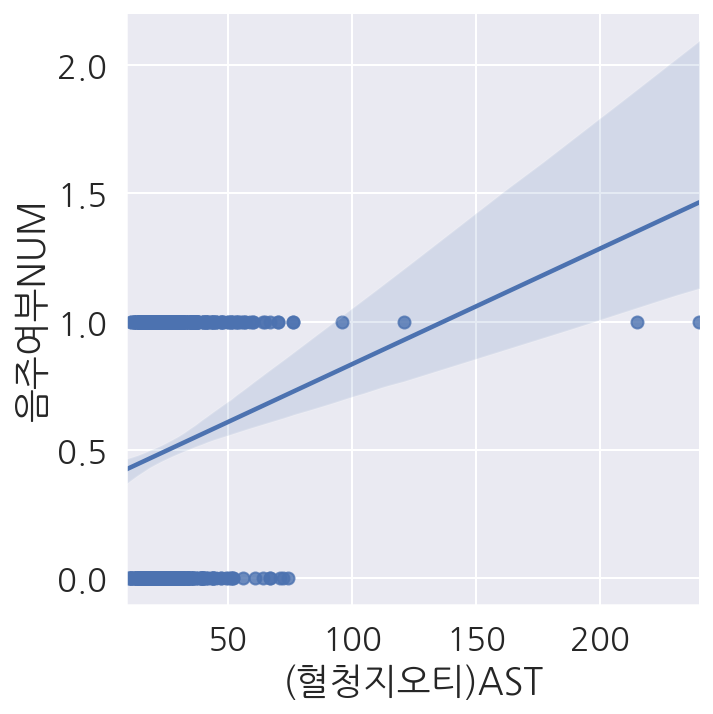

In [137]:
sns.lmplot(data=df_sample, x="(혈청지오티)AST", y="음주여부NUM", robust=True)
#sns.lmplot(data=df_sample, x="(혈청지오티)AST", y="음주여부", robust=True)

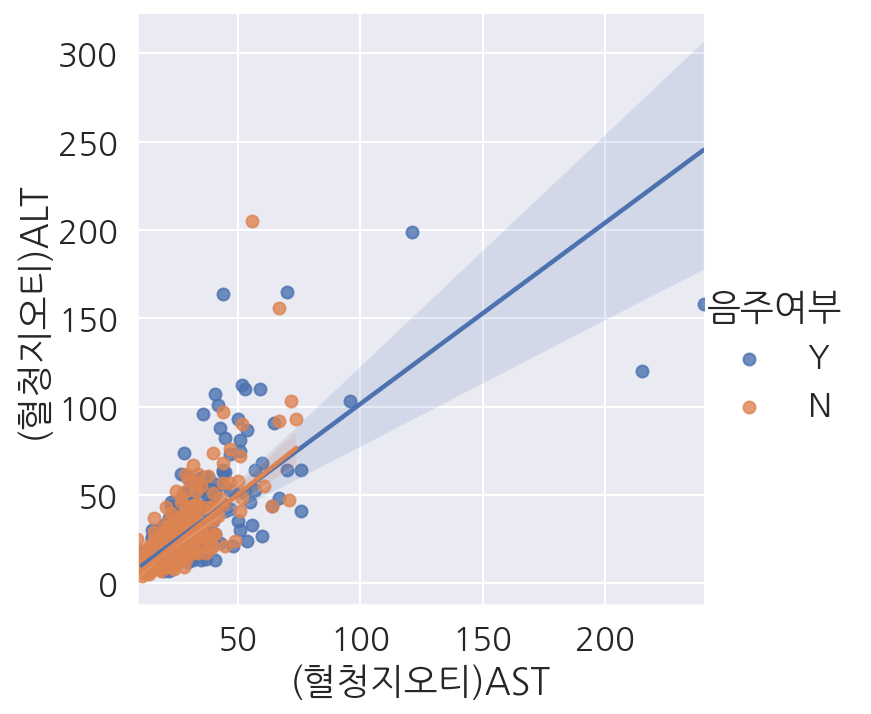

In [138]:
#sns.lmplot(data=df_sample, x="(혈청지오티)AST", y="음주여부NUM", robust=True)
sns.lmplot(data=df_sample, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부", robust=True)

# robust라는 옵션을 활용하면 이상치를 빼고 그립니다. 
# seaborn의 장점은 값만 넣어주면 그래프를 자동으로 그려준다는 것입니다. 속도가 오래 걸립니다.
# 이상치가 있으면 회귀선이 영향을 많이 받으므로 robust 옵션을 사용해주는 것이 좋습니다.

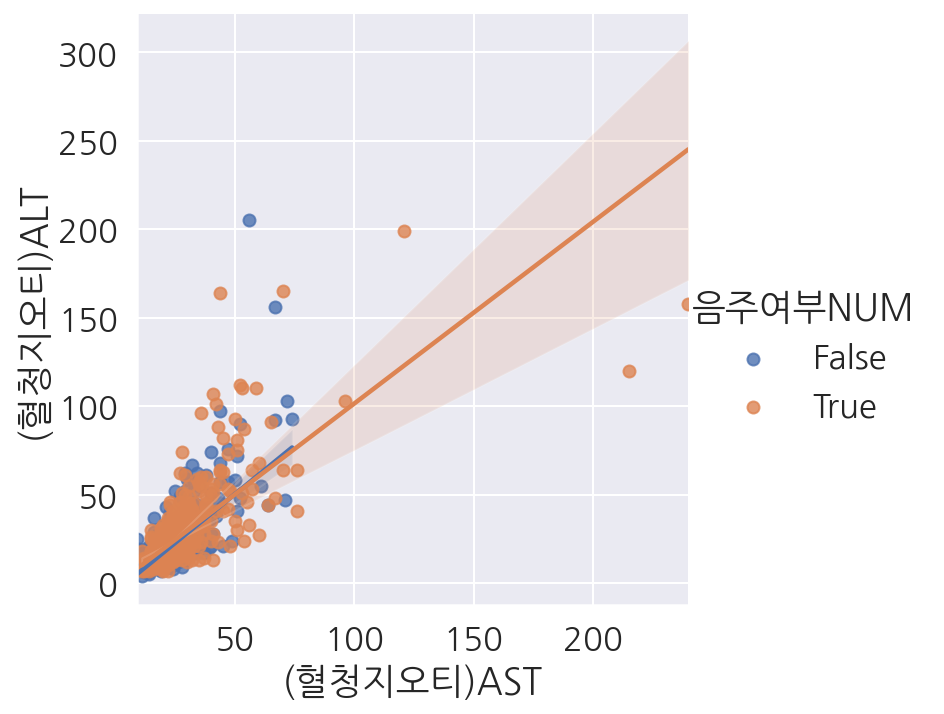

In [139]:
sns.lmplot(data=df_sample, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부NUM", robust=True)

In [140]:
df_ASLT = df_sample[(df_sample["(혈청지오티)AST"] < 400) & (df_sample["(혈청지오티)ALT"] < 400)]
df_ASLT
# 범위를 지정하여 데이터셋을 만들어줍니다.

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg단위)   허리둘레  \
276826  2017   276827     1           12    41        160         55   77.0   
849425  2017   849426     1            9    31        170         75   89.9   
504499  2017   504500     1            8    42        170         75   86.3   
601054  2017   601055     1           14    31        170         70   84.0   
980221  2017   980222     1           17    41        160         60   86.0   
...      ...      ...   ...          ...   ...        ...        ...    ...   
890013  2017   890014     2            8    41        155         80   98.0   
875389  2017   875390     1           11    41        170         60   81.0   
358458  2017   358459     1            9    11        170         90  101.0   
808228  2017   808229     1           11    28        160         65   85.0   
317698  2017   317699     1            9    41        165         85  100.0   

        시력(좌)  시력(우)  ...  흡연상태  음주여부  구강검진수검여부  치아우식증유무  결손치유무  치아마모증유무  \
276826    0.9    0.9  ...   3.0     Y         N      NaN    NaN      NaN   
849425    1.0    1.0  ...   3.0     Y         Y      NaN    NaN      NaN   
504499    1.5    1.5  ...   3.0     Y         Y      NaN    NaN      NaN   
601054    0.8    0.9  ...   3.0     N         N      NaN    NaN      NaN   
980221    0.7    0.5  ...   1.0     N         N      NaN    NaN      NaN   
...       ...    ...  ...   ...   ...       ...      ...    ...      ...   
890013    0.2    0.2  ...   1.0     N         Y      NaN    NaN      NaN   
875389    1.0    0.9  ...   3.0     Y         N      NaN    NaN      NaN   
358458    1.2    1.2  ...   2.0     Y         N      NaN    NaN      NaN   
808228    0.6    0.9  ...   2.0     N         N      NaN    NaN      NaN   
317698    1.2    1.0  ...   3.0     Y         N      NaN    NaN      NaN   

        제3대구치(사랑니)이상   치석     데이터공개일자  음주여부NUM  
276826           NaN  NaN  2018-11-26     True  
849425           NaN    Y  2018-11-26     True  
504499           NaN    Y  2018-11-26     True  
601054           NaN  NaN  2018-11-26    False  
980221           NaN  NaN  2018-11-26    False  
...              ...  ...         ...      ...  
890013           NaN    Y  2018-11-26    False  
875389           NaN  NaN  2018-11-26     True  
358458           NaN  NaN  2018-11-26     True  
808228           NaN  NaN  2018-11-26    False  
317698           NaN  NaN  2018-11-26     True  

[999 rows x 35 columns]

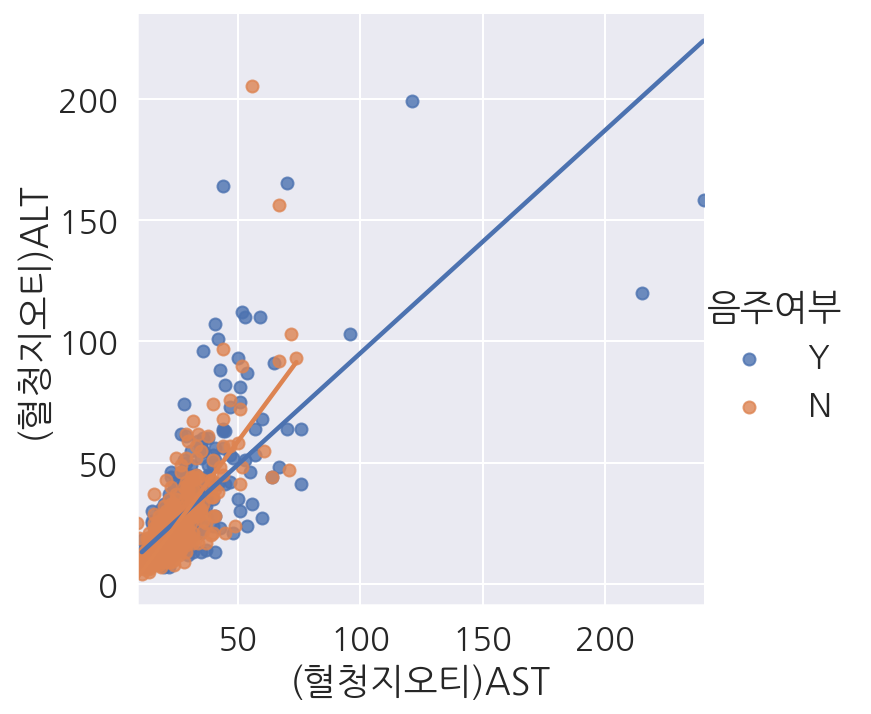

In [141]:
sns.lmplot(data=df_ASLT, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부", ci=None)

# 범위를 지정하여 변수로 만들어주면 그래프를 그리는 데에 시간이 더 짧게 걸립니다.

In [152]:
df_ASLT_high = df[(df["(혈청지오티)AST"] > 400) | (df["(혈청지오티)ALT"] > 400)]
df_ASLT_high
# AST와 ALT의 이상치들만 모은 데이터를 만듭니다.

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg단위)   허리둘레  \
4754    2017     4755     1            9    41        170         55   74.0   
15820   2017    15821     2           13    45        150         55   83.0   
17830   2017    17831     2            8    41        150         50   64.6   
19949   2017    19950     1            6    41        170        105  103.0   
26464   2017    26465     1            7    41        175         70   82.0   
...      ...      ...   ...          ...   ...        ...        ...    ...   
982305  2017   982306     2           16    28        155         50   79.3   
990867  2017   990868     2           11    41        145         45   75.0   
991226  2017   991227     1            6    42        170         80   81.0   
992747  2017   992748     2           10    41        165         40   58.0   
995323  2017   995324     1            7    11        185        105  101.4   

        시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진수검여부  치아우식증유무  결손치유무  \
4754      1.0    0.7  ...  125.0   3.0     Y         N      NaN    NaN   
15820     0.6    1.2  ...  999.0   1.0     Y         N      NaN    NaN   
17830     1.2    1.2  ...  111.0   3.0     Y         Y      NaN    NaN   
19949     1.0    1.2  ...  133.0   1.0     N         N      NaN    NaN   
26464     1.2    1.2  ...  169.0   1.0     N         Y      NaN    NaN   
...       ...    ...  ...    ...   ...   ...       ...      ...    ...   
982305    0.4    0.7  ...   71.0   1.0     N         N      NaN    NaN   
990867    0.9    1.2  ...  279.0   1.0     N         N      NaN    NaN   
991226    0.7    0.8  ...   49.0   3.0     Y         N      NaN    NaN   
992747    0.9    0.7  ...  777.0   3.0     Y         N      NaN    NaN   
995323    0.7    0.7  ...  174.0   3.0     Y         N      NaN    NaN   

        치아마모증유무  제3대구치(사랑니)이상   치석     데이터공개일자  
4754        NaN           NaN  NaN  2018-11-26  
15820       NaN           NaN  NaN  2018-11-26  
17830       NaN           NaN    Y  2018-11-26  
19949       NaN           NaN  NaN  2018-11-26  
26464       NaN           NaN    Y  2018-11-26  
...         ...           ...  ...         ...  
982305      NaN           NaN  NaN  2018-11-26  
990867      NaN           NaN  NaN  2018-11-26  
991226      NaN           NaN  NaN  2018-11-26  
992747      NaN           NaN  NaN  2018-11-26  
995323      NaN           NaN  NaN  2018-11-26  

[381 rows x 34 columns]

In [158]:
df_ASLT_high[["(혈청지오티)AST", "(혈청지오티)ALT", "음주여부"]]
df_ASLT_high[df_ASLT_high["(혈청지오티)AST"] > 8000]

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg단위)  허리둘레  \
541757  2017   541758     1           11    41        170         45  66.0   

        시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진수검여부  치아우식증유무  결손치유무  \
541757    0.9    0.7  ...  419.0   3.0     Y         N      NaN    NaN   

        치아마모증유무  제3대구치(사랑니)이상   치석     데이터공개일자  
541757      NaN           NaN  NaN  2018-11-26  

[1 rows x 34 columns]

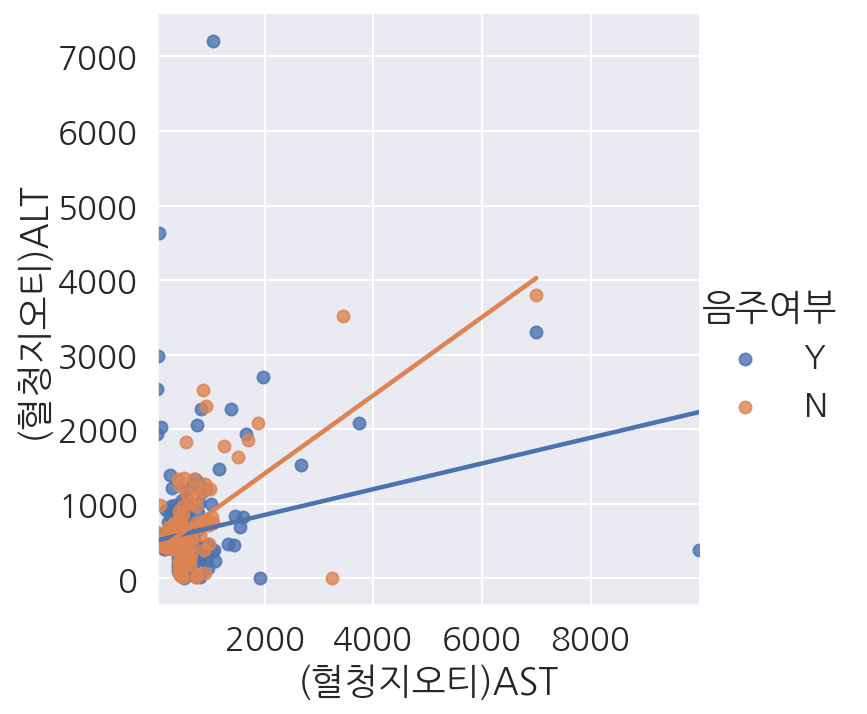

In [148]:
sns.lmplot(data=df_ASLT_high, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부", ci=None)
# 음주여부까지 함께 데이터를 살펴봅니다.

In [151]:
df_ASLT_high_8000 = df_ASLT_high[df_ASLT_high["(혈청지오티)AST"] > 8000]
#df_ASLT_high_8000.iloc[:, 10:27]
df_ASLT_high_8000.iloc[:, :]

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg단위)  허리둘레  \
541757  2017   541758     1           11    41        170         45  66.0   

        시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진수검여부  치아우식증유무  결손치유무  \
541757    0.9    0.7  ...  419.0   3.0     Y         N      NaN    NaN   

        치아마모증유무  제3대구치(사랑니)이상   치석     데이터공개일자  
541757      NaN           NaN  NaN  2018-11-26  

[1 rows x 34 columns]